# **Data-Driven Film Industry Study**
### *Just Kens - Group 14*



## **Project Overview**
This project aims to provide data-driven insights and recommendations. The primary objectives are to analyse the attributes of top-grossing movies from the past decade, including genre, creative type, production method, release month, and production budget, to determine which factors contribute to high box office performance. Through rigorous analysis, we aim to identify which elements significantly impact a movie's financial success. By extrapolating from this analysis, we intend to offer concrete recommendations specifically tailored to various types of films. Ultimately, our objective is to furnish valuable insights rooted in data to help the target audience make well-informed decisions about entering and/or thriving in the filmmaking business.

# Import all the Python libraries that are required

1. **Beautiful Soup** is a Python library for parsing and extracting data from HTML and XML documents.

2. **Cloudscraper** is used for making web requests and bypassing anti-scraping measures to access web content.

3. **Requests** is used for making HTTP requests to interact with web services or retrieve web content. It simplifies the process of sending HTTP requests and handling responses, making it a crucial tool for tasks such as web scraping.

**Install the `cloudscraper` library**


In [ ]:
!pip install cloudscraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import cloudscraper
import pandas as pd
import seaborn as sns


# Web Scraping with Cloudscraper and BeautifulSoup

This function demonstrates how to perform web scraping using the `cloudscraper` library to bypass certain security measures and retrieve data from a website.


1. **Create a Cloudscraper session:** We start by creating a Cloudscraper session using `cloudscraper.create_scraper()`. This session helps us bypass security measures on the website.

2. **Specify the URL:** The target URL is specified, which is the page containing movie data.

3. **Make the Request:** We use the Cloudscraper session to make a GET request to the specified URL.

4. **Check the Request Status:** We check if the request was successful by examining the HTTP status code. A status code of 200 indicates a successful request.

5. **Parse the Page Content:** If the request is successful, we parse the HTML content of the page using BeautifulSoup. In this example, we aim to extract data from an HTML table.

6. **Extract Data:** We locate and extract the table from the HTML content and read it into a Pandas DataFrame for further analysis.

7. **Display the Data:** Finally, the extracted data is printed to the console.

In [ ]:
def scrape_movie_data(year):
    # Create a Cloudscraper session
    scraper = cloudscraper.create_scraper()

    # Specify the URL for the given year
    url = f"https://www.the-numbers.com/movies/report/All/All/All/All/All/All/All/All/All/None/None/{year}/{year}/None/None/None/None/None/None?show-release-date=On&view-order-by=domestic-box-office&show-release-year=On&view-order-direction=desc&show-production-budget=On&show-domestic-box-office=On&show-international-box-office=On&show-worldwide-box-office=On&show-genre=On&show-production-method=On&show-creative-type=On"

    # Use the Cloudscraper session to make the request
    response = scraper.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # The content of the web page can be accessed using response.text
        page_content = response.text

        # Now, parse the page content using BeautifulSoup
        soup = BeautifulSoup(page_content, 'html.parser')

        # Find the table containing the data
        table = soup.find('table')

        # Read the HTML table into a pandas DataFrame
        dataframe = pd.read_html(str(table))[0]

        return dataframe
    else:
        print(f"Failed to retrieve the webpage.")


# Scraping and Merging Movie Data
This code below scrapes movie data for the years 2000 to 2023 and merges it into a single dataset using the pandas library. The data is collected for each year in the specified range and then concatenated into a single DataFrame.

1. Looping through Years: The loop iterates from 2000 to 2023, fetching movie data for each year.

2. Data Retrieval: Inside the loop, the scrape_movie_data function is called with the current year, and the data for that year is obtained.

3. Appending DataFrames: The retrieved data for each year is appended to a list of DataFrames called dataframes.

4. After collecting data for all the years, the code uses pd.concat to concatenate all the DataFrames from the list into a single merged DataFrame.

5. Finally, the merged data is stored in a `.csv` file.

In [ ]:
dataframes = []

# Loop through the years 2000 to 2023
for year in range(2000, 2024):
    data_for_year = scrape_movie_data(year)
    dataframes.append(data_for_year)

# Concatenate all the DataFrames in the list into a single DataFrame
merged_data = pd.concat(dataframes, ignore_index=True)

Print the first few rows of the merged dataset (confirms that the dataset starts from the year 2000)

In [ ]:
merged_data.head()

,Unnamed: 0,Released,Released.1,Title,Genre,Production Method,Creative Type,Production Budget,Domestic Box Office,International Box Office,Worldwide Box Office
0,1,"Nov 17, 2000",2000,How the Grinch Stole Christmas,Adventure,Live Action,Kids Fiction,"$123,000,000","$260,348,825","$85,096,578","$345,445,403"
1,2,"Dec 22, 2000",2000,Cast Away,Adventure,Live Action,Contemporary Fiction,"$85,000,000","$233,632,142","$193,598,374","$427,230,516"
2,3,"May 24, 2000",2000,Mission: Impossible 2,Action,Live Action,Contemporary Fiction,"$120,000,000","$215,409,889","$334,178,627","$549,588,516"
3,4,"May 5, 2000",2000,Gladiator,Action,Live Action,Historical Fiction,"$103,000,000","$187,683,805","$263,999,794","$451,683,599"
4,5,"Dec 15, 2000",2000,What Women Want,Romantic Comedy,Live Action,Contemporary Fiction,"$65,000,000","$182,805,123","$191,300,000","$374,105,123"


Print the last few rows of the merged dataset (confirms that the dataset ends at the year 2023)


In [ ]:
merged_data.tail()

,Unnamed: 0,Released,Released.1,Title,Genre,Production Method,Creative Type,Production Budget,Domestic Box Office,International Box Office,Worldwide Box Office
2395,96,"Mar 3, 2023",2023,Operation Fortune: Ruse de guerre,Action,Live Action,Contemporary Fiction,"$50,000,000","$6,496,125","$21,372,316","$27,868,441"
2396,97,"Nov 17, 2023",2023,Next Goal Wins,Comedy,Live Action,Dramatization,"$10,000,000","$6,494,194",$0,"$6,494,194"
2397,98,"May 5, 2023",2023,Love Again,Romantic Comedy,Live Action,Contemporary Fiction,$0,"$6,230,837","$4,495,195","$10,726,032"
2398,99,"Nov 10, 2023",2023,Journey to Bethlehem,Musical,Live Action,Dramatization,"$6,000,000","$6,225,881","$147,793","$6,373,674"
2399,100,"Feb 2, 2023",2023,The Chosen Season 3 Finale,Drama,Live Action,Dramatization,$0,"$5,525,069","$64,318","$5,589,387"


Get the shape of the dataset

In [ ]:
merged_data.shape

(2400, 11)

Store the raw merged data in a `raw_movie_data.csv` file

In [ ]:
merged_data.to_csv('raw_movie_data.csv', index=False)

# Data Cleaning


The `clean` function will ensure that the dataset is cleaned and adjusted according to the project's requirements.

#### Function's Goals

- **Dropping the 'Unnamed:0' Column:** The function will start by dropping the 'Unnamed:0' column, which is typically an unnecessary index column in the original HTML format of the scraped tables.


- **Renaming Columns:** All the columns will renamed to in a specific notation:

- **Removing Dollar Signs and Commas from Dollar Amounts:** The function will also remove dollar signs ( $ ) and commas ( , ) from dollar amounts in columns.

- **Converting Dollar Amounts to Integers:** After removing special characters, the function will convert the dollar amounts from strings into integers, making them suitable for numerical calculations.

In [ ]:
merged_data = pd.read_csv('raw_movie_data.csv')

In [ ]:
merged_data.columns

Index(['Unnamed: 0', 'Released', 'Released.1', 'Title', 'Genre',
       'Production Method', 'Creative Type', 'Production Budget',
       'Domestic Box Office', 'International Box Office',
       'Worldwide Box Office'],
      dtype='object')

In [ ]:
def clean(df):
    # Drop 'Unnamed' column
    df = df.drop(columns='Unnamed: 0')

    # Make column names lowercase
    df.columns = [x.lower() for x in df.columns]

    # Rename certain columns
    df = df.rename(columns=
     {
        'released': 'release_date',
        'released.1': 'release_year',
        'production method': 'production_method',
        'domestic box office': 'domestic_gross',
        'international box office': 'international_gross',
        'worldwide box office': 'worldwide_gross',
        'creative type': 'creative_type',
        'production budget': 'budget'
      }
    )

    # Removing dollar signs and commas from dollar amounts and converting dollar amounts from strings into integers
    df['domestic_gross'] = df['domestic_gross'].str.replace(',', '', regex=False).str.replace('$', '', regex=False).astype(int)
    df['international_gross'] = df['international_gross'].str.replace(',', '', regex=False).str.replace('$', '', regex=False).astype(int)
    df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '', regex=False).str.replace('$', '', regex=False).astype(int)
    df['budget'] = df['budget'].str.replace(',', '', regex=False).str.replace('$', '', regex=False).astype(int)


    # convert release date column to datetime values
    df['release_date'] = pd.to_datetime(df['release_date'])

    # create release year column
    df['release_year'] = df['release_date'].dt.year

    # create release month column
    df['release_month'] = df['release_date'].dt.strftime('%B')

    return df


In [ ]:
merged_data = clean(merged_data)

Store the raw merged data in a `clean_movie_data.csv` file

In [ ]:
merged_data.to_csv('clean_movie_data.csv', index=False)

# Exploratory Data Analysis


## **DataFrame Summary**
To gain insights into the structure and characteristics of the cleaned dataframe, we use `.info()` to get a concise summary of the DataFrame, including data types, non-null counts, and memory usage in order to gauge at the integrity of the data, `.head()` to display the first few rows of the DataFrame, and `describe()` to generate descriptive statistics that summarize the central tendency, dispersion, and shape of the distribution of numerical columns.
This allows us to get a sense of the data's format and content.


In [ ]:
merged_data.head()

,release_date,release_year,title,genre,production_method,creative_type,budget,domestic_gross,international_gross,worldwide_gross,release_month
0,2000-11-17,2000,How the Grinch Stole Christmas,Adventure,Live Action,Kids Fiction,123000000,260348825,85096578,345445403,November
1,2000-12-22,2000,Cast Away,Adventure,Live Action,Contemporary Fiction,85000000,233632142,193598374,427230516,December
2,2000-05-24,2000,Mission: Impossible 2,Action,Live Action,Contemporary Fiction,120000000,215409889,334178627,549588516,May
3,2000-05-05,2000,Gladiator,Action,Live Action,Historical Fiction,103000000,187683805,263999794,451683599,May
4,2000-12-15,2000,What Women Want,Romantic Comedy,Live Action,Contemporary Fiction,65000000,182805123,191300000,374105123,December


In [ ]:
merged_data.shape

(2400, 11)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   release_date         2400 non-null   datetime64[ns]
 1   release_year         2400 non-null   int64         
 2   title                2400 non-null   object        
 3   genre                2400 non-null   object        
 4   production_method    2400 non-null   object        
 5   creative_type        2400 non-null   object        
 6   budget               2400 non-null   int64         
 7   domestic_gross       2400 non-null   int64         
 8   international_gross  2400 non-null   int64         
 9   worldwide_gross      2400 non-null   int64         
 10  release_month        2400 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 206.4+ KB


The uniform count of non-null values across all columns indicates the absence of any missing or null values in the dataset.

In [ ]:
merged_data.describe()

,release_year,budget,domestic_gross,international_gross,worldwide_gross
count,2400.000000,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03
mean,2011.500000,5.749589e+07,8.439174e+07,1.100552e+08,1.944470e+08
std,6.923629,5.812236e+07,9.260348e+07,1.696765e+08,2.536221e+08
min,2000.000000,0.000000e+00,3.553080e+05,0.000000e+00,3.678490e+05
25%,2005.750000,1.700000e+07,3.304457e+07,1.733697e+07,5.461248e+07
50%,2011.500000,4.000000e+07,5.413326e+07,4.889388e+07,1.052294e+08
75%,2017.250000,8.000000e+07,1.006647e+08,1.223602e+08,2.186983e+08
max,2023.000000,4.600000e+08,9.366622e+08,2.138484e+09,2.923706e+09


## **Data Visualisation and Analysis (Pre-Production)**
In this section, we plot our data via various graphs in order to explore the relationships between various key elements and movie revenue. This analysis aims to uncover patterns, trends, and correlations that may provide insights into factors influencing revenue in the dataset.



### **Release Month Distribution**
This code explores the distribution of movie releases across different months to identify any patterns or trends.

To visualize the distribution of movie releases by month, we use a bar plot. This allows us to observe how many movies were released in each month.


December     267
November     241
August       211
October      208
July         208
June         206
March        200
February     191
September    180
May          170
April        170
January      148
Name: release_month, dtype: int64


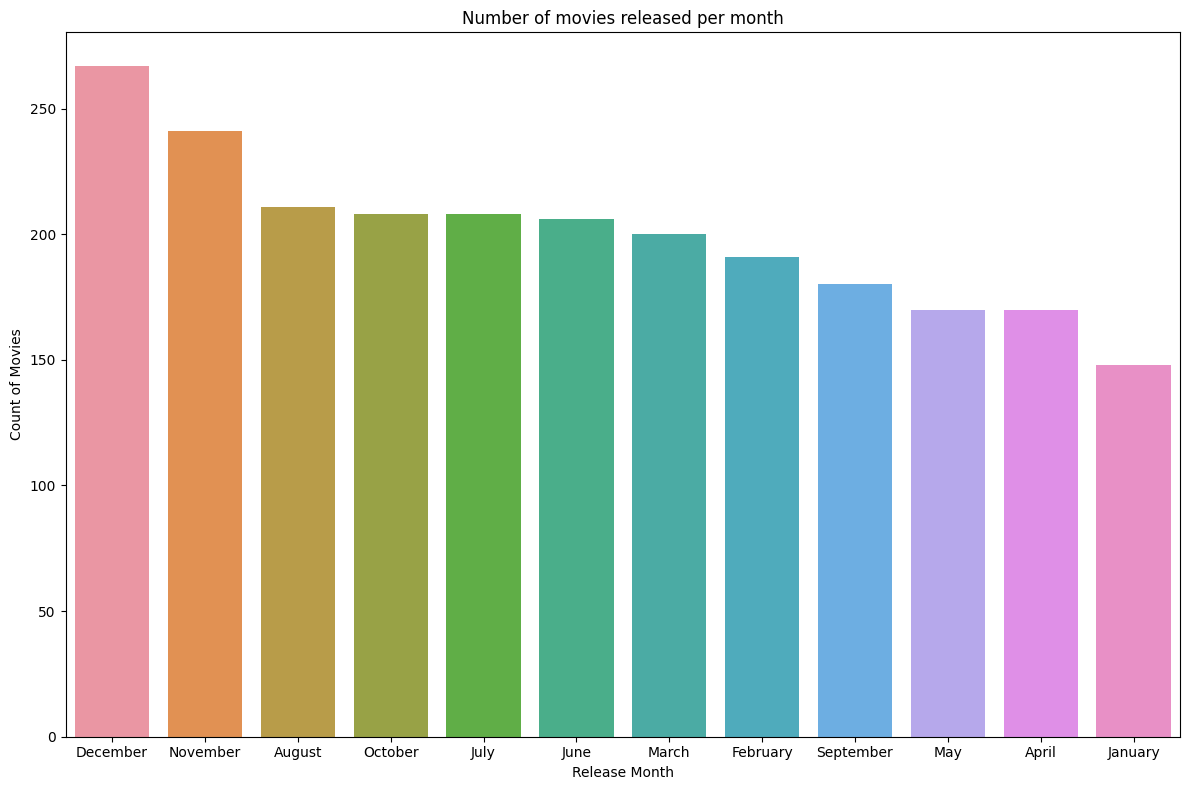

In [ ]:
value_counts = merged_data['release_month'].value_counts()
print(value_counts)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_data, x='release_month', order=value_counts.index)

plt.title('Number of movies released per month')
plt.xlabel('Release Month')
plt.ylabel('Count of Movies')
plt.tight_layout()

plt.show()

- **Peak Months:** December and November exhibit the highest counts, implying a heightened popularity for movie releases during the holiday season. The film industry often strategically schedules major releases to coincide with increased audience engagement during these festive months.
  
- **Variability:** The overall distribution exhibits variability, suggesting that the frequency of movie releases varies across different months. This variability may be influenced by industry trends, marketing strategies, or thematic considerations.

- **Lower Activity:** January appears to have a lower count compared to other months, indicating potentially reduced movie releases during this period.  This could be attributed to factors such as post-holiday industry adjustments, reduced audience attendance, colder weather, or less interest from audience during these months since the holidays are over.

#### **Based on this, most movies are released during the Holidays season.**


Next, we see the worldwide gross distribution for each month.

In [ ]:
release_month_stats = merged_data.groupby('release_month')['worldwide_gross'].agg(['median', 'mean', 'std'])
release_month_stats.sort_values(by='mean', ascending=False)

,median,mean,std
release_month,,,
May,232165655.0,3.378787e+08,3.277100e+08
July,162377352.0,2.760170e+08,2.995711e+08
June,194945446.5,2.702058e+08,2.826936e+08
December,134612435.0,2.398570e+08,3.448506e+08
November,141484812.0,2.320121e+08,2.575221e+08
March,101227224.5,1.746094e+08,2.018302e+08
April,79732315.5,1.694499e+08,3.278159e+08
October,92997040.0,1.320998e+08,1.457077e+08
February,78353508.0,1.287535e+08,1.515622e+08


- May, June, and July stand out as the top-performing months in terms of mean worldwide gross profits.
  - These months reflect the summer vacations and hence are often associated with Blockbuster releases
    - A recent example of this with the back-to-back release of blockbuster 2023 movies like Barbie, Oppenheimer, Insidious 4, Mission Impossible Dead Reckoning, and Indiana Jones, all of which released from May to July.
  - These months also have high Standard Deviation values, indicating a wide range of financial success for movies released during this period.
- December, often associated with the holiday season, also exhibits a respectable mean worldwide gross. This could also coincide with the most number of movies releasing in December out of all the months, hence more options and more frequent visits to cinemas.


**Box-and-Whisker Plot for Earnings per Release Month**

Compared to other plots, box plot is the best choice to visually compare the distributions of earnings categorized by release months since they provide a clear summary of the central tendency, spread, and potential outliers in a concise manner.

- **With Outliers:** First, we plot with outliers. This is done to showcase the full range of values and identifying potential extreme data points, hence gathering a complete representation of our dataset.

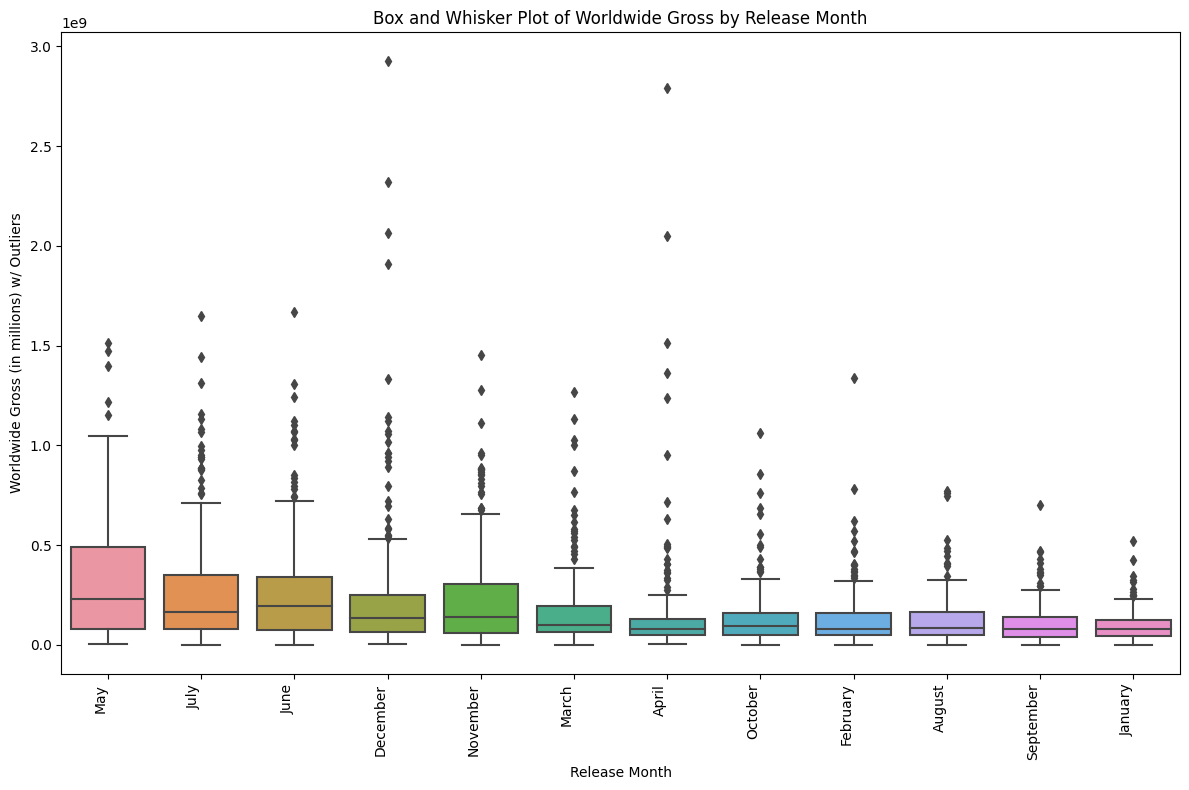

In [ ]:
plt.figure(figsize=(12, 8))

# Box Plot
sns.boxplot(x='release_month', y='worldwide_gross', data=merged_data, showfliers = True, order=release_month_stats.sort_values(by='mean', ascending=False).index)

# Title and labels
plt.title('Box and Whisker Plot of Worldwide Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross (in millions) w/ Outliers')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()

# Show the plot
plt.show()

- **Without Outliers:** Next, we plot the same graph but this time without outliers. This is mainly done to remove the visual clutter so it is easier to discern and interpret the main features of the plot.

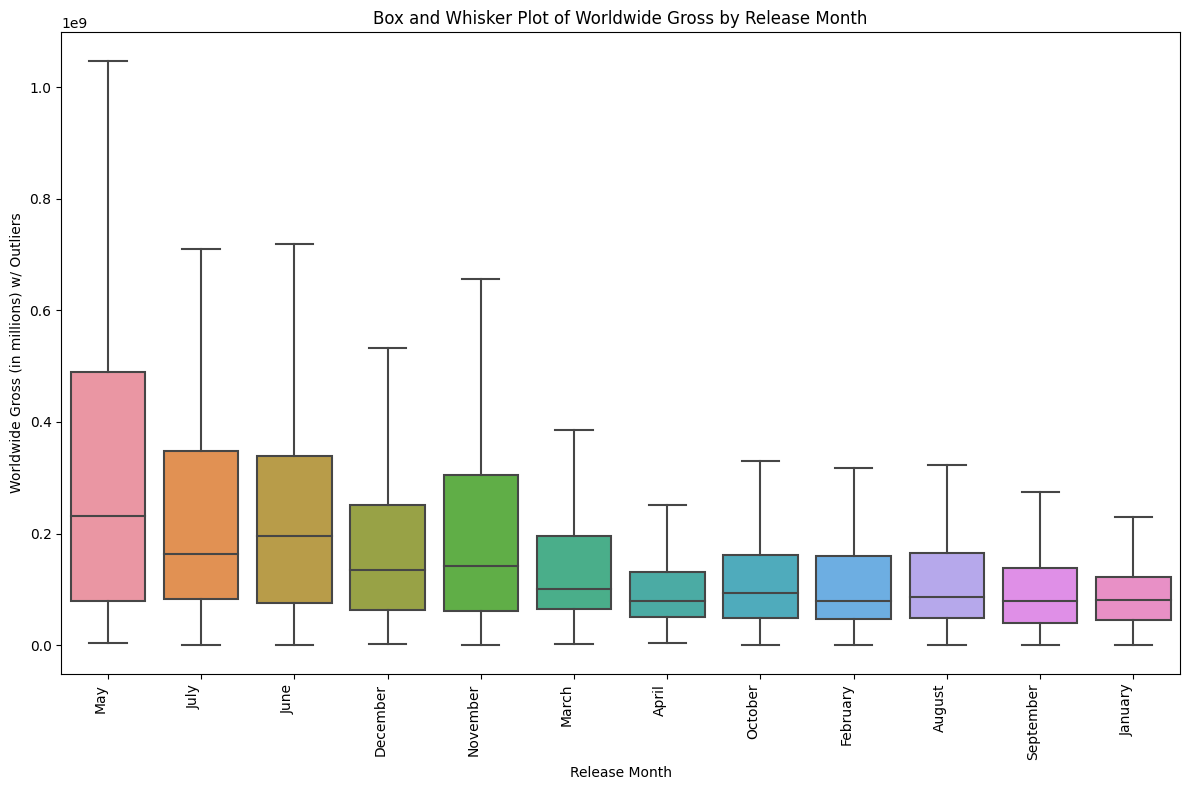

In [ ]:
plt.figure(figsize=(12, 8))

# Create a Box Plot
sns.boxplot(x='release_month', y='worldwide_gross', data=merged_data, showfliers = False, order=release_month_stats.sort_values(by='mean', ascending=False).index)

# Title and labels
plt.title('Box and Whisker Plot of Worldwide Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross (in millions) w/ Outliers')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()

# Show the plot
plt.show()

From the plot, we can see clearly that May, June, July are the most profitable months with highest mean and median values for the worldwide box office gross.

**Bar Plot for Top 5 Genres Per Month**
- Next, we examine the top 5 genres that dominate each month of the year. This exploration aims to uncover patterns in genre preferences across different seasons and months.

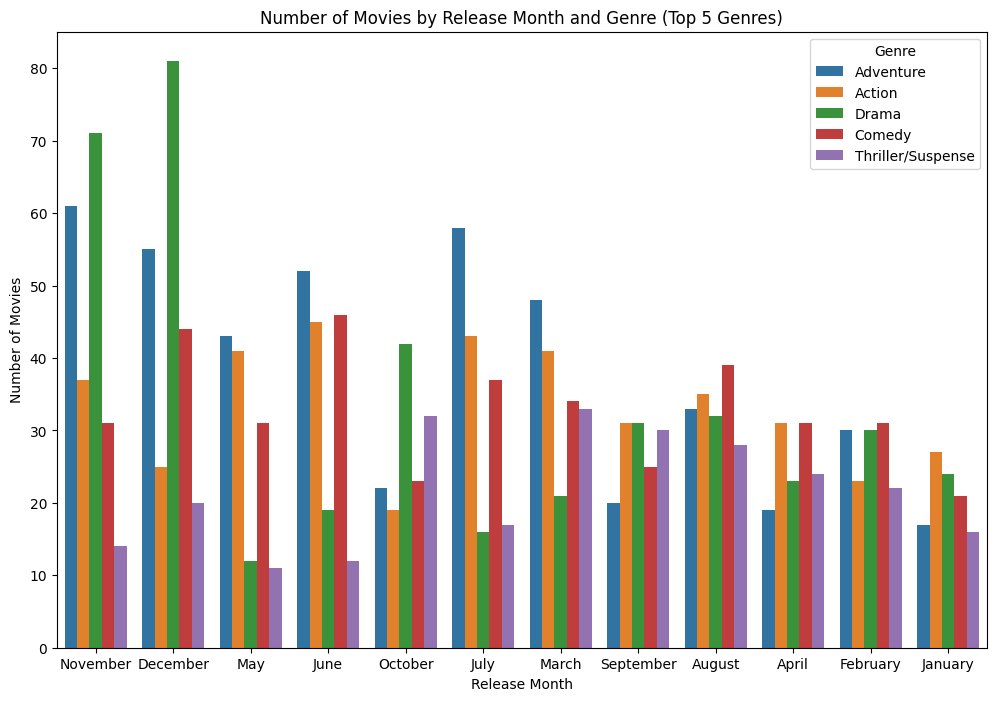

In [ ]:
# Select the top 5 genres
top_genres = merged_data['genre'].value_counts().nlargest(5).index

# Filter the data for the top genres
filtered_data = merged_data[merged_data['genre'].isin(top_genres)]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_data, x='release_month', hue='genre')

# Title and labels
plt.title('Number of Movies by Release Month and Genre (Top 5 Genres)')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')

plt.legend(title='Genre')

# Show the plot
plt.show()

### **Genre Distribution**
This code explores the distribution of movie releases across different genres to identify any patterns or trends.


**Number of Movies Per Genre**
- To visualize the distribution of movie releases by genre, we use a bar plot. This allows us to observe how many movies were released (for our timeframe) in each genre.


Adventure              458
Drama                  402
Action                 398
Comedy                 393
Thriller/Suspense      259
Horror                 233
Romantic Comedy        124
Black Comedy            39
Musical                 32
Documentary             28
Western                 18
Concert/Performance     13
Multiple Genres          2
Reality                  1
Name: genre, dtype: int64


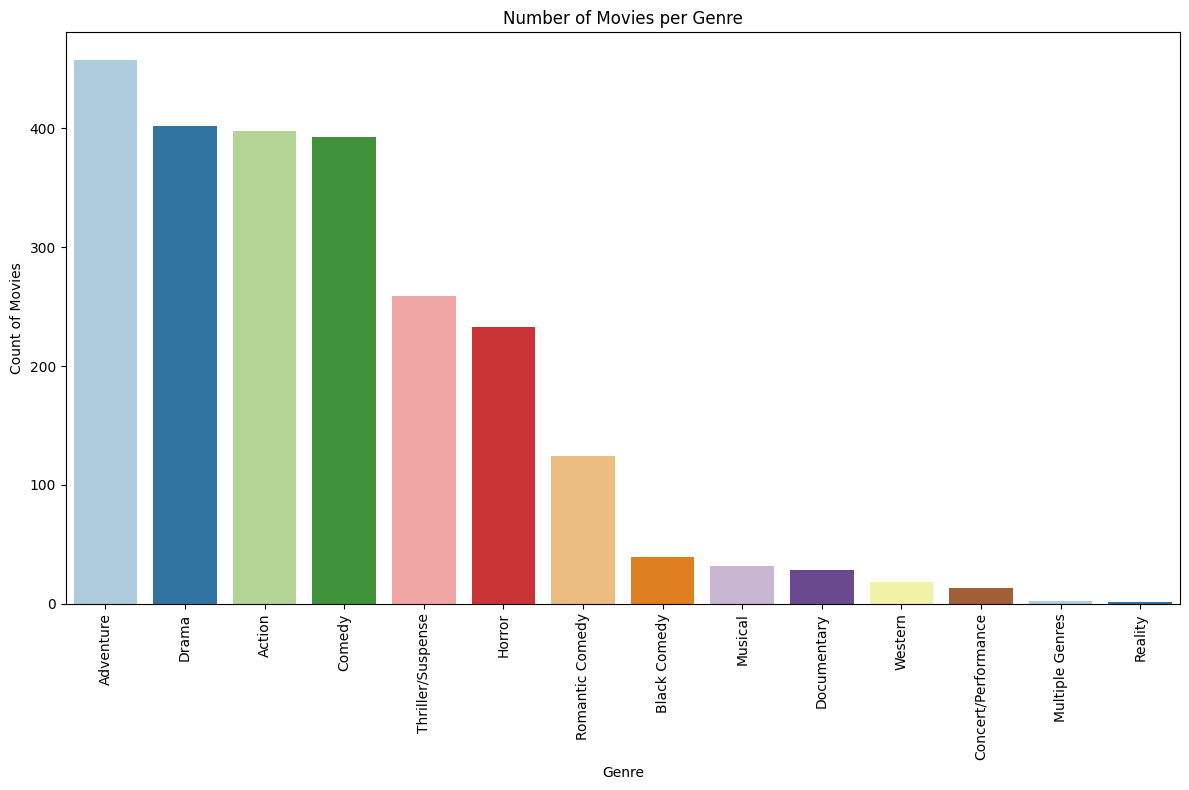

In [ ]:
value_counts = merged_data['genre'].value_counts()
print(value_counts)

plt.figure(figsize=(12, 8))

# Create a Bar plot
sns.countplot(data=merged_data, x='genre', order=value_counts.index, palette='Paired')

# Title and labels
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.xticks(rotation=90)

plt.tight_layout()

# Show the plot
plt.show()

- **Adventure, Drama, Action, and Comedy:**
  - These genres dominate the dataset, with Adventure leading with 455 movies. This suggests a strong presence of mainstream genres.

- **Thriller/Suspense, Horror:**
  - Genres like Thriller/Suspense and Horror also have substantial representation, catering to audiences seeking suspenseful or frightening experiences.

- **Romantic Comedy, Black Comedy, Musical:**
  - These genres have a moderate presence, offering a diverse range of themes for viewers.

- **Documentary, Western, Concert/Performance, Multiple Genres, Reality:**
  - These genres have comparatively lower counts, indicating a more niche or specialized appeal.

Getting the `mean` and `median` of the worldwide_gross, categorized by the genre. This will provide insights into the average and middle values of the worldwide gross revenue within different genres, helping us with our research question about finding the most profitable genre.

In [ ]:
genre_stats = merged_data.groupby('genre')['worldwide_gross'].agg(['median', 'mean', 'std'])
genre_stats.sort_values(by='mean', ascending=False)

,median,mean,std
genre,,,
Action,195239161.0,3.374352e+08,3.890965e+08
Adventure,217275579.5,3.334689e+08,3.060318e+08
Musical,153549948.0,2.609938e+08,3.261242e+08
Thriller/Suspense,85583945.0,1.344442e+08,1.505214e+08
Western,87547696.0,1.244477e+08,1.065484e+08
Drama,73881525.5,1.154287e+08,1.309185e+08
Romantic Comedy,97886591.5,1.150248e+08,8.126131e+07
Comedy,80812424.0,1.108154e+08,1.105991e+08
Horror,81263489.0,1.023568e+08,8.807517e+07


We observe that all the earnings are presented in millions. While these large values provide a comprehensive view of the financial performance of movies, they may prove challenging to visualize on plots without appropriate scaling. To address this, it is advisable to normalize the earnings by dividing them by a million.

**Normalizing the Numeric data**


In [ ]:
merged_data['budget'] = merged_data['budget'] / 1000000

merged_data['domestic_gross'] = merged_data['domestic_gross'] / 1000000

merged_data['international_gross'] = merged_data['international_gross'] / 1000000

merged_data['worldwide_gross'] = merged_data['worldwide_gross'] / 1000000

merged_data.head()

,release_date,release_year,title,genre,production_method,creative_type,budget,domestic_gross,international_gross,worldwide_gross,release_month
0,2000-11-17,2000,How the Grinch Stole Christmas,Adventure,Live Action,Kids Fiction,123.0,260.348825,85.096578,345.445403,November
1,2000-12-22,2000,Cast Away,Adventure,Live Action,Contemporary Fiction,85.0,233.632142,193.598374,427.230516,December
2,2000-05-24,2000,Mission: Impossible 2,Action,Live Action,Contemporary Fiction,120.0,215.409889,334.178627,549.588516,May
3,2000-05-05,2000,Gladiator,Action,Live Action,Historical Fiction,103.0,187.683805,263.999794,451.683599,May
4,2000-12-15,2000,What Women Want,Romantic Comedy,Live Action,Contemporary Fiction,65.0,182.805123,191.300000,374.105123,December


Try getting the `mean` and `median` again, now that the numerical columns have been normalized.

In [ ]:
genre_stats = merged_data.groupby('genre')['worldwide_gross'].agg(['median', 'mean'])
genre_stats.sort_values(by='mean', ascending=False)

,median,mean
genre,,
Action,195.239161,337.435225
Adventure,217.275579,333.468879
Musical,153.549948,260.993776
Thriller/Suspense,85.583945,134.444172
Western,87.547696,124.447736
Drama,73.881526,115.428659
Romantic Comedy,97.886591,115.024765
Comedy,80.812424,110.815424
Horror,81.263489,102.356804


- **Action and Adventure Genres:**
  - These genres have both high median and mean worldwide gross earnings, indicating consistent strong performance.
  - They also have the largest standard deviations.

- **Musical Genre:**
  - While having a lower median compared to Action and Adventure, the Musical genre shows a higher mean, suggesting some movies in this genre achieve exceptionally high earnings.

- **Documentary and Multiple Genres:**
  - These genres have lower median and mean values, indicating a more diverse range of performance with some movies achieving moderate success.

- **Reality Genre:**
  - The Reality genre has the same median and mean value, suggesting a consistent performance across movies in this category and has the lowest standard deviations to show for that.

**Box-and-Whisker Plot for Earnings per Genre**

Compared to other plots, box plot is the best choice to visually compare the distributions of earnings categorized by genre since they provide a clear summary of the central tendency, spread, and potential outliers in a concise manner.

- **With Outliers:** First, we plot with outliers. This is done to showcase the full range of values and identifying potential extreme data points, hence gathering a complete representation of our dataset.

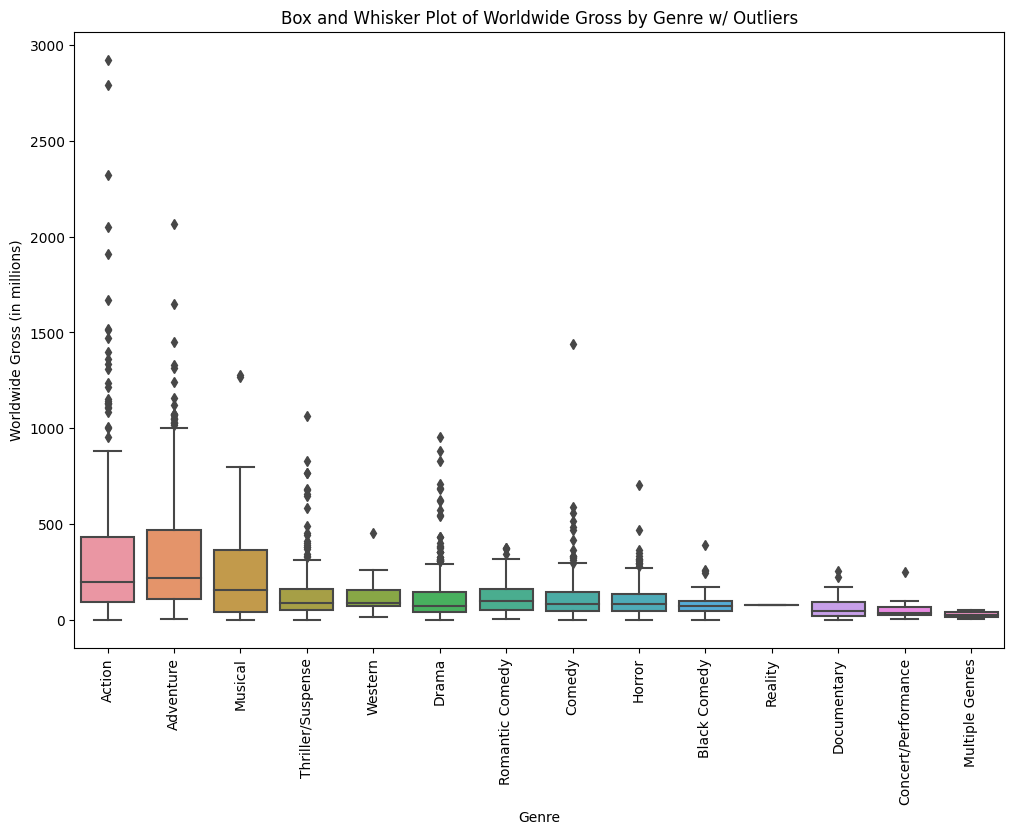

In [ ]:
plt.figure(figsize=(12, 8))

# Create a box Plot
sns.boxplot(x='genre', y='worldwide_gross', data=merged_data, showfliers = True, order=genre_stats.sort_values(by='mean', ascending=False).index)

# Titles and Labels
plt.title('Box and Whisker Plot of Worldwide Gross by Genre w/ Outliers')
plt.xlabel('Genre')
plt.ylabel('Worldwide Gross (in millions)')
plt.xticks(rotation=90)

# Show the plot
plt.show()

- **Without Outliers:** Next, we plot the same graph but this time without outliers. This is mainly done to remove the visual clutter so it is easier to discern and interpret the main features of the plot.

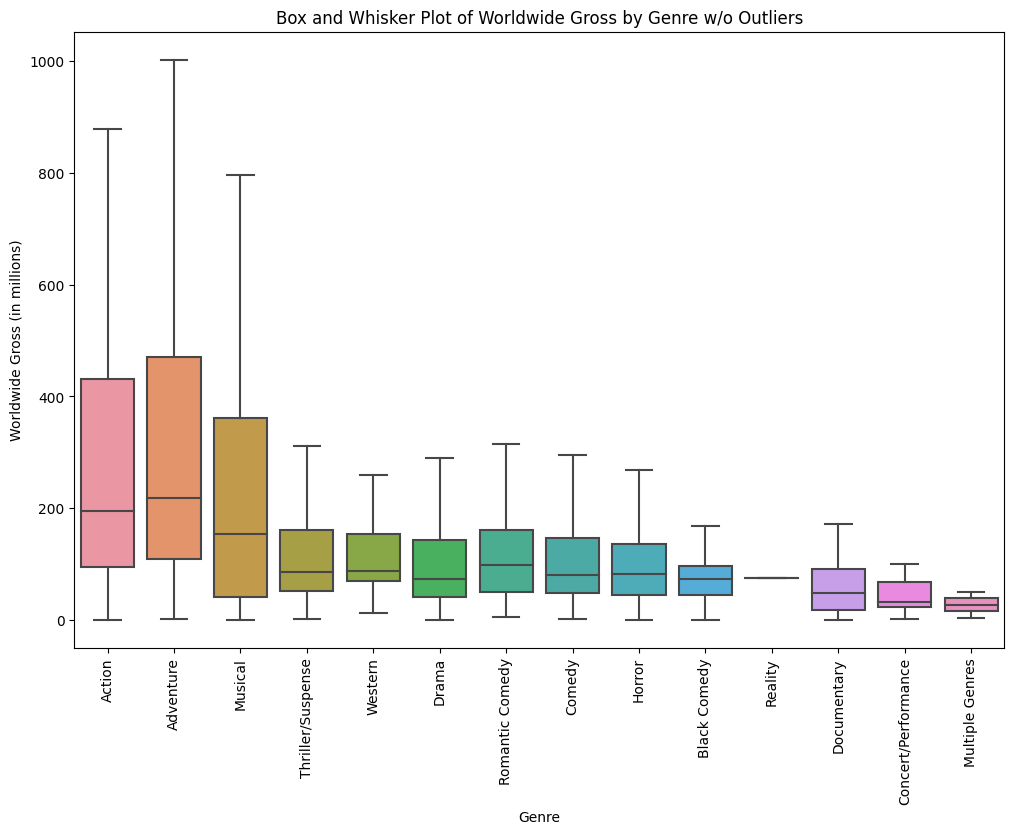

In [ ]:
plt.figure(figsize=(12, 8))

# Create a box Plot
sns.boxplot(x='genre', y='worldwide_gross', data=merged_data, showfliers = False, order=genre_stats.sort_values(by='mean', ascending=False).index)

# Titles and Labels
plt.title('Box and Whisker Plot of Worldwide Gross by Genre w/o Outliers')
plt.xlabel('Genre')
plt.ylabel('Worldwide Gross (in millions)')
plt.xticks(rotation=90)

# Show the plot
plt.show()

 - In our exploration above, `Adventure` emerges as the most lucrative genre, earning wise. However, it's important to note that `Adventure` also exhibits the largest interquartile range (IQR) among the genres, indicating considerable variability in earnings within this genre.

- Following `Adventure`, both `Action` and `Musical` genres stand out as high-grossing categories, but similar to `Adventure`, these genres also show substantial IQRs, suggesting a wide range of earnings distribution.

- The `Action` genre, in particular, displays a notable number of high-grossing outliers, as evident in the first box plot. These outliers represent movies within the `Action` genre that have achieved exceptional financial success beyond the typical range.

#### A Closer Look at `Adventure` genre
Given that Adventure emerges as the highest-grossing genre in our dataset, we now delve into a more detailed examination of this genre's worldwide gross earnings.



Top 5 Highest-Grossing Adventure Movies: 
	Harry Potter and the Deathly Hallows:… : 2011-07-15
	Star Wars Ep. VII: The Force Awakens : 2015-12-18
	Star Wars Ep. VIII: The Last Jedi : 2017-12-15
	The Lion King : 2019-07-19
	Frozen II : 2019-11-22




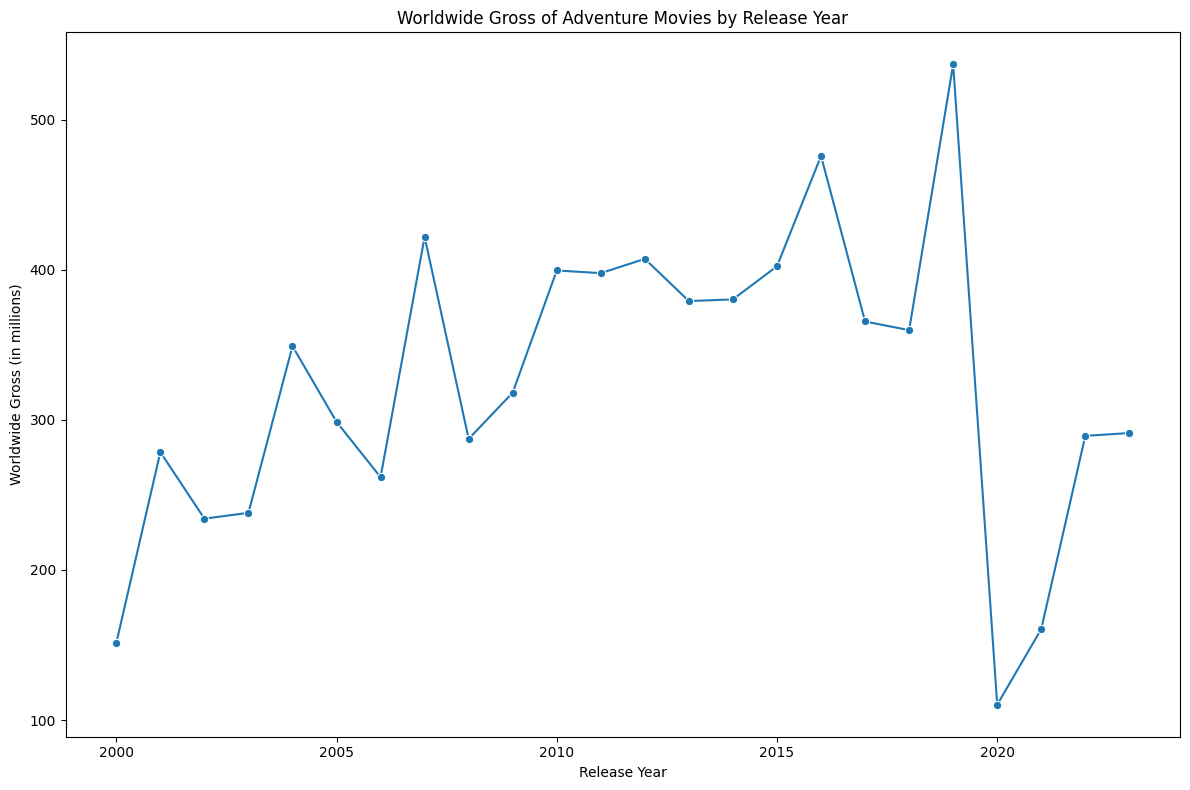

In [ ]:
# Filter data for Adventure genre
adventure_data = merged_data[merged_data['genre'] == 'Adventure']

# Get the top 5 highest-grossing Adventure movies
top_movies = adventure_data.nlargest(5, 'worldwide_gross')

# Sort by release date
top_movies_sorted = top_movies.sort_values(by='release_date')

# Get the movie titles
top_titles = list(top_movies_sorted['title'])

# Get the movie release data
top_release_dates = list(top_movies_sorted['release_date'].dt.strftime('%Y-%m-%d'))  # Format release dates

# Print the sorted top titles and their respective release dates
print("Top 5 Highest-Grossing Adventure Movies: ")
for title, release_date in zip(top_titles, top_release_dates):
    print(f'\t{title} : {release_date}')

print("\n")

# Plot the Line Plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=adventure_data, x='release_year', y='worldwide_gross', err_style=None, marker='o')

# Titles and Labels
plt.title('Worldwide Gross of Adventure Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Worldwide Gross (in millions)')

plt.tight_layout()

# Show the plot
plt.show()

A general upward trend is evident, indicating consistent growth in financial success over the years. However, a notable anomaly occurs in 2020, where there is a drastic unexpected dip in worldwide grosses.

- **Understanding the 2020 dip:**
  - The unexpected dip in 2020 could be attributed to the global COVID-19 pandemic. The pandemic, which significantly impacted various industries, including the film and entertainment sector, led to widespread disruptions in movie production, distribution, and exhibition.


Now, we examine these top 5 highest grossing action movies to see if they share any attributes which might help us see if  any common attribute contributes to the success.

In [ ]:
top_movies.sort_values(by = 'worldwide_gross', ascending = False).head()

,release_date,release_year,title,genre,production_method,creative_type,budget,domestic_gross,international_gross,worldwide_gross,release_month
1500,2015-12-18,2015,Star Wars Ep. VII: The Force Awakens,Adventure,Animation/Live Action,Science Fiction,306.0,936.662225,1127.953592,2064.615817,December
1901,2019-07-19,2019,The Lion King,Adventure,Animation/Live Action,Kids Fiction,260.0,543.638043,1102.468736,1646.106779,July
1903,2019-11-22,2019,Frozen II,Adventure,Digital Animation,Kids Fiction,150.0,477.373578,974.279738,1451.653316,November
1700,2017-12-15,2017,Star Wars Ep. VIII: The Last Jedi,Adventure,Animation/Live Action,Science Fiction,262.0,620.181382,711.453759,1331.635141,December
1100,2011-07-15,2011,Harry Potter and the Deathly Hallows:…,Adventure,Animation/Live Action,Fantasy,125.0,381.193157,931.250693,1312.443850,July


- All the titles are part of iconic franchises and either sequels or remakes. Recognizable and well-established franchises or titles may contribute to the success of these movies.
- Four out of five movies are `Animation/Live Action`
- Three out of five movies released in November and December, which happen to fall under holiday season and are in line with our earlier graph of movie count by months and the analysis that there is a larger audience during these months.



#### **Based on this analysis, the most lucrative Genre to release a new movie in is `Adventure`**

### **Creative_Type Distribution**
This code explores the distribution of movie releases across different creative types to identify any patterns or trends.



To visualize the distribution of movie releases by creative types, we use a bar plot. This allows us to observe how many movies were released (for our timeframe) in each genre.


Contemporary Fiction       1186
Kids Fiction                252
Science Fiction             235
Dramatization               208
Historical Fiction          206
Fantasy                     168
Super Hero                  103
Factual                      38
Multiple Creative Types       4
Name: creative_type, dtype: int64


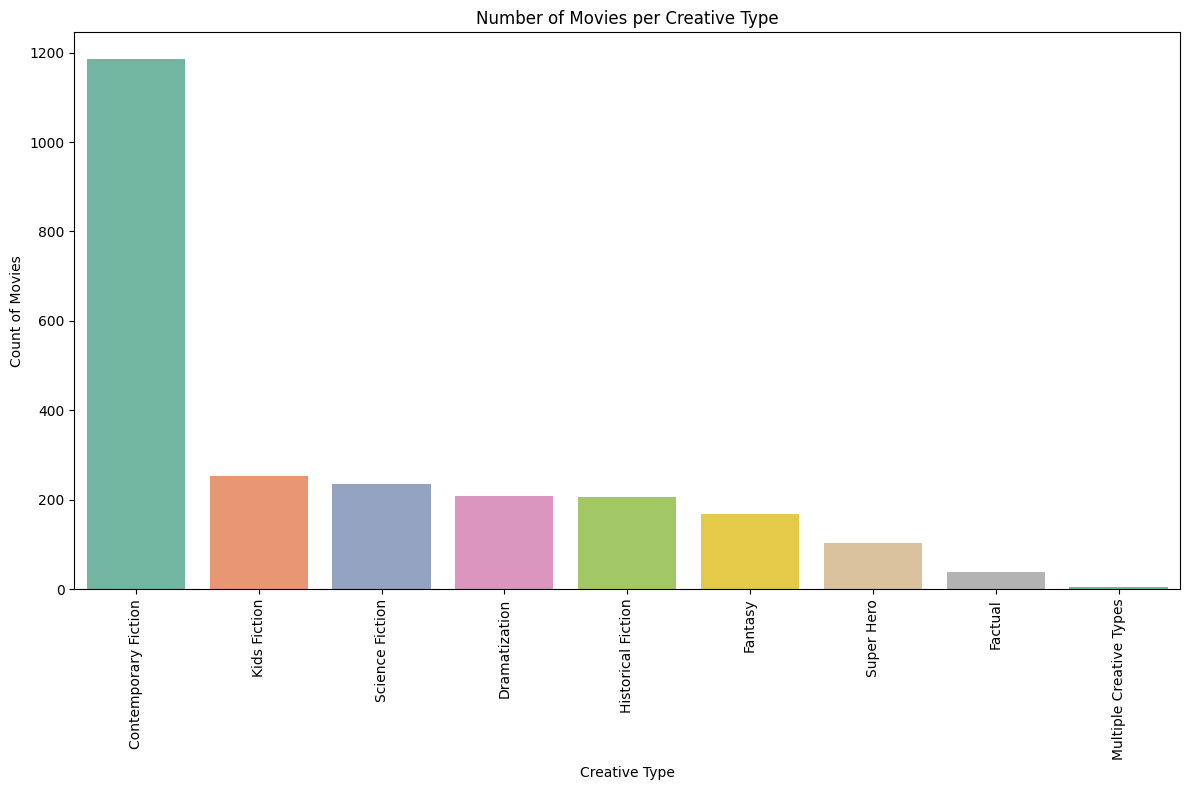

In [ ]:
value_counts = merged_data['creative_type'].value_counts()
print(value_counts)

plt.figure(figsize=(12, 8))

# Create the bar plot
sns.countplot(data=merged_data, x='creative_type', order=value_counts.index, palette='Set2')

# Labels and Title
plt.title('Number of Movies per Creative Type')
plt.xlabel('Creative Type')
plt.ylabel('Count of Movies')
plt.xticks(rotation=90)

plt.tight_layout()

# Show the plot
plt.show()

`Contemporary Fiction` dominates the dataset, signifying a substantial preference for stories set in modern, real-world contexts. When combined, the count of movies in other creative types (Kids Fiction, Science Fiction, Historical Fiction, Dramatization, Fantasy, Super Hero, Factual, Multiple Creative Types) is still notably lower than Contemporary Fiction, emphasizing a clear preference among filmmakers and audiences.

In [ ]:
creative_type_stats = merged_data.groupby('creative_type')['worldwide_gross'].agg(['median', 'mean', 'std'])
creative_type_stats.sort_values(by='mean', ascending=False)

,median,mean,std
creative_type,,,
Super Hero,459.260946,566.598823,458.009146
Kids Fiction,197.718219,305.959040,288.483981
Science Fiction,176.038324,302.086299,366.406408
Fantasy,163.994484,297.831789,303.952196
Historical Fiction,97.934222,155.954619,175.277827
Contemporary Fiction,82.632340,126.565023,146.454506
Dramatization,75.704176,120.554909,135.560686
Factual,47.361451,70.855223,66.233413
Multiple Creative Types,26.746268,46.169959,60.769544


- `Super Hero` creative type stands tall over all the other types. This indicates that a significant number of Super Hero films consistently achieve substantial global earnings.
- For `Kids Fiction`, `Science Fiction`, and `Fantasy` the big difference between the median and the mean reveals variation; while some movies perform exceptionally well, there is variability in the financial success of others. This makes them rather riskier than `Super Hero` type.
- The remaining types show a more modest earning pattern, in comparison.

**Box-and-Whisker Plot for Earnings per Creative Type**

- **With Outliers:** First, we plot with outliers. This is done to showcase the full range of values and identifying potential extreme data points, hence gathering a complete representation of our dataset.

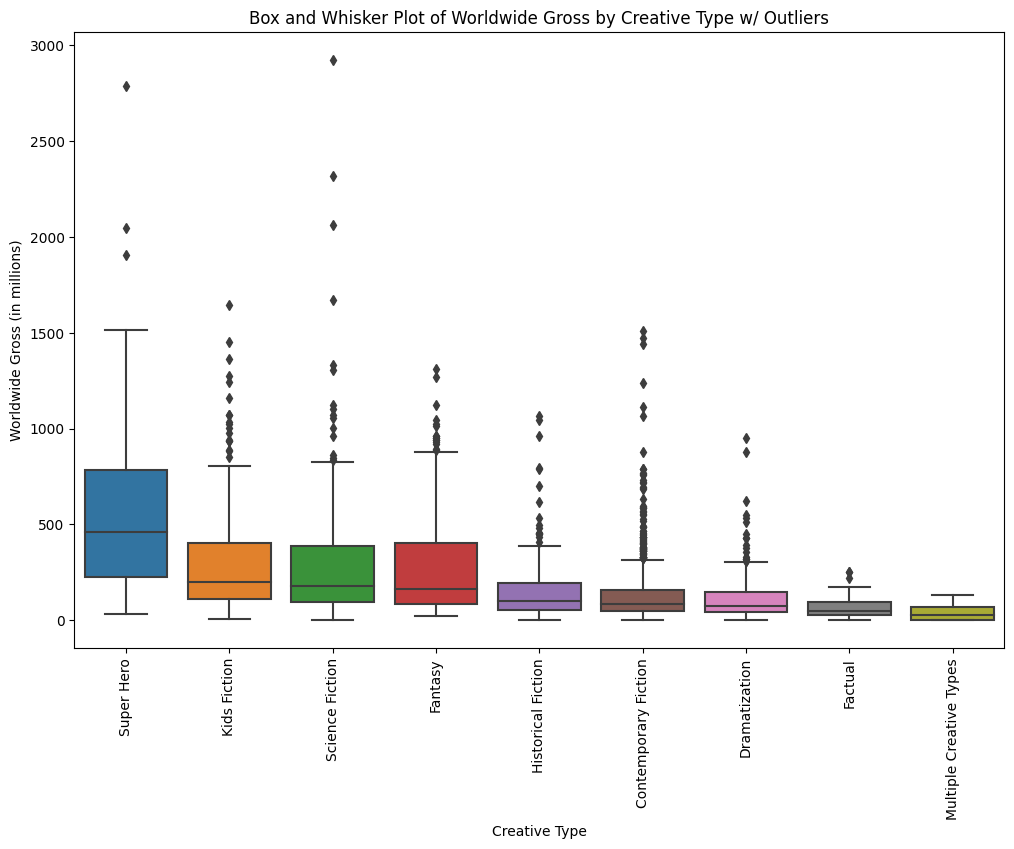

In [ ]:
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='creative_type', y='worldwide_gross', data=merged_data, showfliers = True, order=creative_type_stats.sort_values(by='mean', ascending=False).index)

# Labels and Title
plt.title('Box and Whisker Plot of Worldwide Gross by Creative Type w/ Outliers')
plt.xlabel('Creative Type')
plt.ylabel('Worldwide Gross (in millions)')
plt.xticks(rotation=90)

# Show the plot
plt.show()

- **Without Outliers:** Next, we plot the same graph but this time without outliers. This is mainly done to remove the visual clutter so it is easier to discern and interpret the main features of the plot.

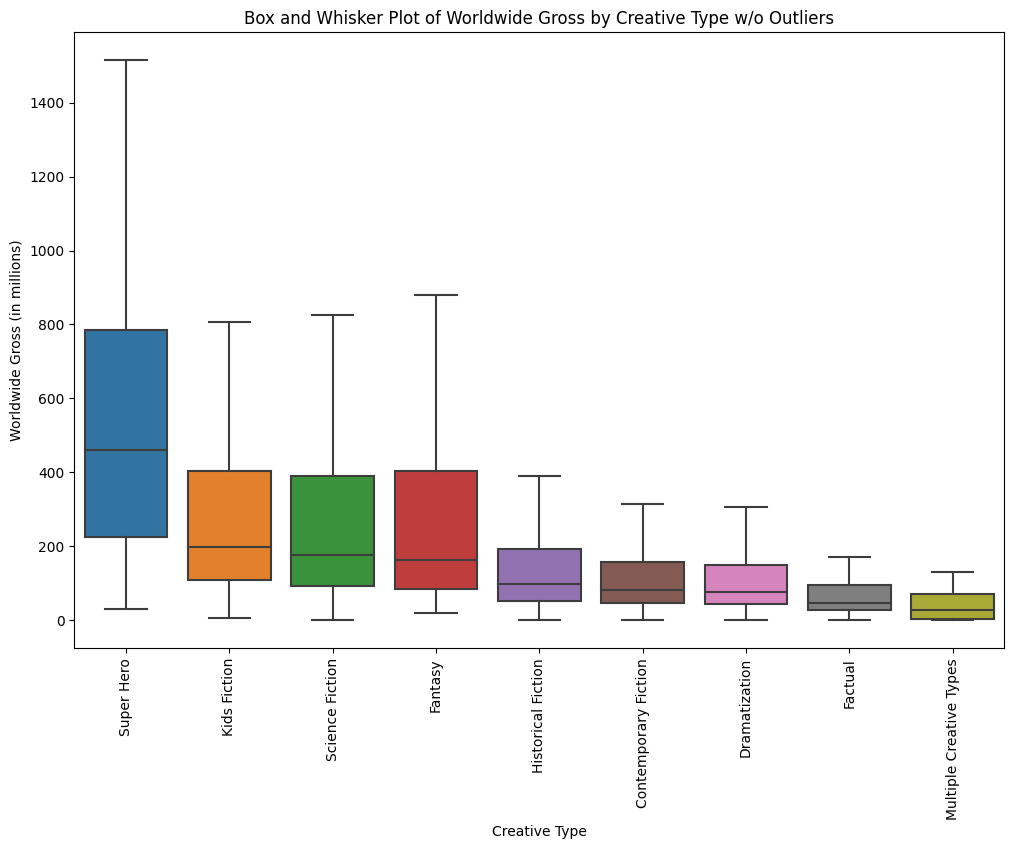

In [ ]:
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='creative_type', y='worldwide_gross', data=merged_data, showfliers = False, order=creative_type_stats.sort_values(by='mean', ascending=False).index)

# Labels and Title
plt.title('Box and Whisker Plot of Worldwide Gross by Creative Type w/o Outliers')
plt.xlabel('Creative Type')
plt.ylabel('Worldwide Gross (in millions)')
plt.xticks(rotation=90)

# Show the plot
plt.show()

 - In our exploration above, `Super Hero` emerges as the most lucrative creative type, earning wise. However, it's important to note that `Super Hero` also exhibits the largest interquartile range (IQR) among the genres, indicating considerable variability in earnings within this genre. That being said, even its lower quartile is greater than the median of all the other genres, reflecting its domination on the box office.

 - The domination of `Super Hero` type is also interesting when the number of releases are taken into account as the type, with its far fewer number of movie releases, still manages to tower over all other types.

- Following `Adventure`, `Kids Fiction`, `Science Fiction`, and `Fantasy` all show more-or-less similar earnings. Though their inter-quartile range is lesser than `Super Hero`, they earn a much more modest amount in comparison.

#### A Closer Look at `Super Hero` creative type
Given that `Super Hero` emerges as the highest-grossing creative type in our dataset, we now delve into a more detailed examination of this creative type's worldwide gross earnings.



Top 5 Highest-Grossing Super Hero Movies: 
	The Avengers : 2012-05-04
	Avengers: Age of Ultron : 2015-05-01
	Avengers: Infinity War : 2018-04-27
	Avengers: Endgame : 2019-04-26
	Spider-Man: No Way Home : 2021-12-17




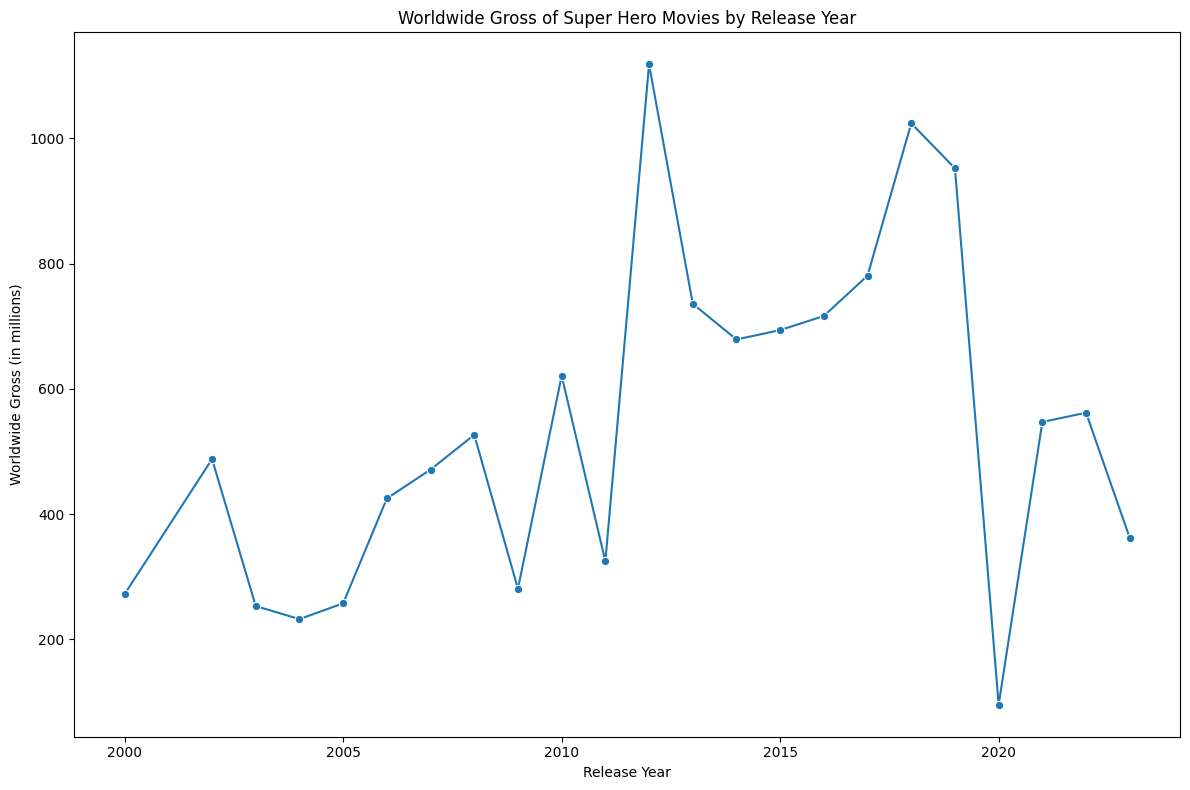

In [ ]:
# Filter data for Super Hero creative type
adventure_data = merged_data[merged_data['creative_type'] == 'Super Hero']

# Get the top 5 highest-grossing movies
top_movies = adventure_data.nlargest(5, 'worldwide_gross')
top_movies_sorted = top_movies.sort_values(by='release_date')  # Sort by release date
top_titles = list(top_movies_sorted['title'])
top_release_dates = list(top_movies_sorted['release_date'].dt.strftime('%Y-%m-%d'))  # Format release dates

# Print the sorted top titles and their respective release dates
print("Top 5 Highest-Grossing Super Hero Movies: ")
for title, release_date in zip(top_titles, top_release_dates):
    print(f'\t{title} : {release_date}')

print("\n")

plt.figure(figsize=(12, 8))

# Create the line plot
sns.lineplot(data=adventure_data, x='release_year', y='worldwide_gross', err_style=None, marker='o')

# Labels and Title
plt.title('Worldwide Gross of Super Hero Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Worldwide Gross (in millions)')
plt.tight_layout()

# Show the plot
plt.show()

- In line with our previous genre-specific analysis, here too, there is a drastic dip in 2020 owing to the COVID-19 global pandemic.

- A general upward trend is evident, indicating consistent growth in financial success over the years. However, a notable anomaly occurs in 2020, where there is a drastic unexpected dip in worldwide grosses.

- **Contexualizing the 2013 dip:**
  - The year 2013 witnessed a notable dip in superhero movie earnings. To understand this decline, we can look at the context of the cinematic landscape during that timeframe.
  - For context, Nolan's The Dark Knight released in 2012 and being one of the most anticipated movies of the decade, it set a high standard for superhero films. However, the subsequent superhero movies struggled to match the same level of critical acclaim and audience reception.
  - Coinciding with this period, the Marvel Cinematic Universe (MCU) began its expansive journey. However, during the initial phases, the general public was not as deeply invested in the MCU characters as they were in iconic figures like Batman. The introduction of relatively new and unfamiliar superheroes may not have attracted as large a crowd during this transitional phase. This initial lack of familiarity could have impacted the box office performance during this specific period.

- However, it is important to see that even the worse-performing years for `Super Hero` outperform some of the other genres.

Now, we examine these top 5 highest grossing Super Hero movies to see if they share any attributes which might help us see if  any common attribute contributes to the success.

In [ ]:
top_movies.sort_values(by = 'worldwide_gross', ascending = False).head()

,release_date,release_year,title,genre,production_method,creative_type,budget,domestic_gross,international_gross,worldwide_gross,release_month
1900,2019-04-26,2019,Avengers: Endgame,Action,Animation/Live Action,Super Hero,400.0,858.373000,1930.539285,2788.912285,April
1801,2018-04-27,2018,Avengers: Infinity War,Action,Animation/Live Action,Super Hero,300.0,678.815482,1369.544272,2048.359754,April
2100,2021-12-17,2021,Spider-Man: No Way Home,Action,Live Action,Super Hero,200.0,814.115070,1093.721184,1907.836254,December
1200,2012-05-04,2012,The Avengers,Action,Animation/Live Action,Super Hero,225.0,623.357910,891.742301,1515.100211,May
1502,2015-05-01,2015,Avengers: Age of Ultron,Action,Animation/Live Action,Super Hero,365.0,459.005868,936.311111,1395.316979,May


As expected, MCU movies, specifically Avengers dominated the Super Hero landscape. All of the movies were of the `Action` genre and `Animation/Live Action`.

#### **Based on this analysis, the most lucrative Creative Type to release a new movie in is `Super Hero`**

### **Production Method Distribution**
This code explores the distribution of movie releases across different production methods to identify any patterns or trends.



Live Action                    2031
Digital Animation               181
Animation/Live Action           156
Hand Animation                   20
Stop-Motion Animation            11
Multiple Production Methods       1
Name: production_method, dtype: int64


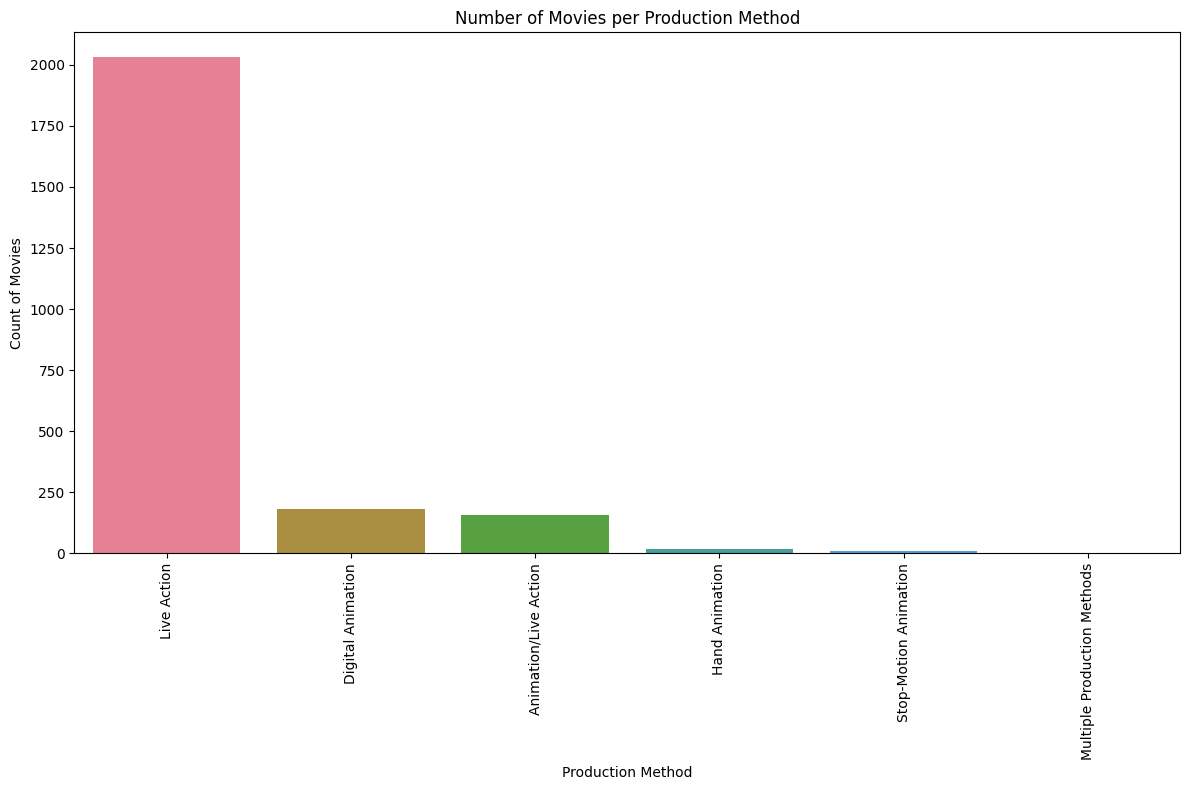

In [ ]:
value_counts = merged_data['production_method'].value_counts()
print(value_counts)

plt.figure(figsize=(12, 8))

# Create the bar plot
sns.countplot(data=merged_data, x='production_method', order=value_counts.index, palette='husl')


# Labels and Title
plt.title('Number of Movies per Production Method')
plt.xlabel('Production Method')
plt.ylabel('Count of Movies')
plt.xticks(rotation=90)

plt.tight_layout()

# Show the plot
plt.show()

Live Action is the most common production method for the movies in our preset timeframe.

In [ ]:
production_method_stats = merged_data.groupby('production_method')['worldwide_gross'].agg(['median', 'mean', 'std'])
production_method_stats.sort_values(by='mean', ascending=False)

,median,mean,std
production_method,,,
Animation/Live Action,404.990832,558.902703,500.817554
Digital Animation,299.477886,370.766189,305.247711
Live Action,93.672764,151.967133,183.447249
Hand Animation,104.900061,124.007778,69.165452
Stop-Motion Animation,111.898741,113.321566,61.275938
Multiple Production Methods,3.304748,3.304748,NaN


- `Animation/Live Action` movies demonstrate high worldwide gross, indicating a robust appeal and commercial success albeit with high standard deviation.
- `Digital Animation` productions also perform well, with a substantial mean worldwide gross.

**Box-and-Whisker Plot for Earnings per Production Method**

- **With Outliers:** First, we plot with outliers. This is done to showcase the full range of values and identifying potential extreme data points, hence gathering a complete representation of our dataset.

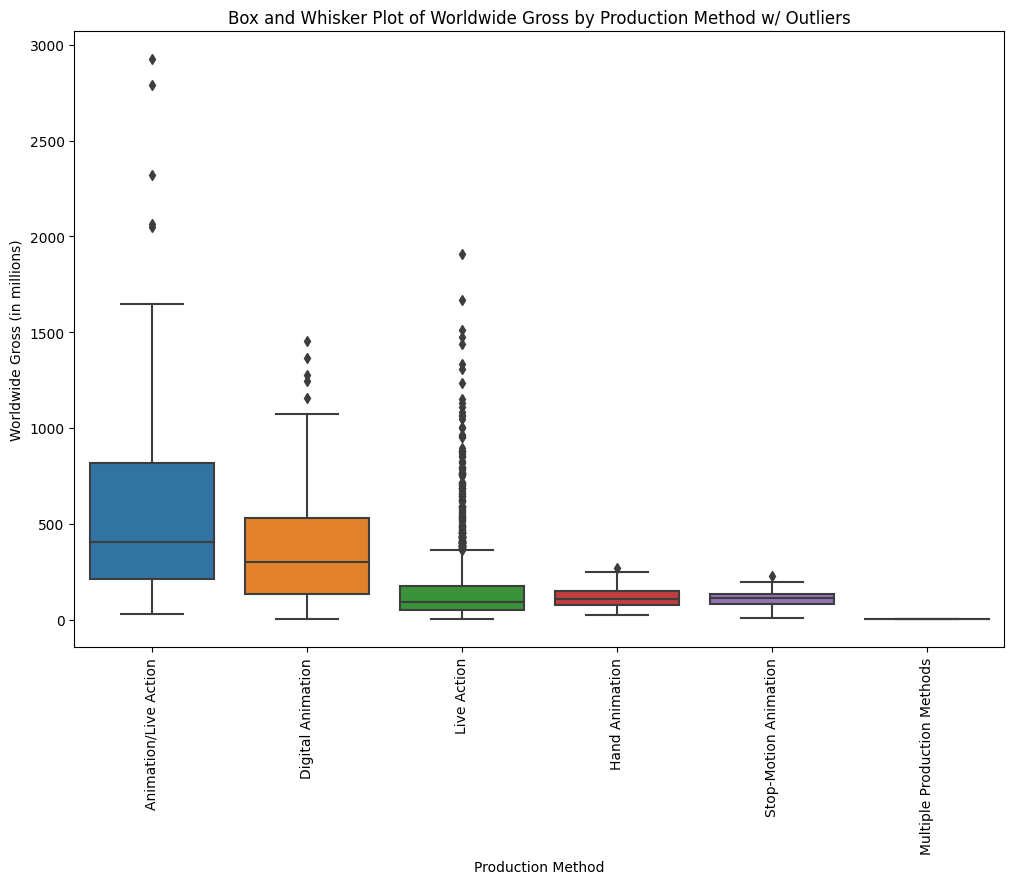

In [ ]:
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='production_method', y='worldwide_gross', data=merged_data, showfliers = True, order=production_method_stats.sort_values(by='mean', ascending=False).index)

# Labels and title
plt.title('Box and Whisker Plot of Worldwide Gross by Production Method w/ Outliers')
plt.xlabel('Production Method')
plt.ylabel('Worldwide Gross (in millions)')
plt.xticks(rotation=90)

# Show plot
plt.show()

- **Without Outliers:** Next, we plot the same graph but this time without outliers. This is mainly done to remove the visual clutter so it is easier to discern and interpret the main features of the plot.

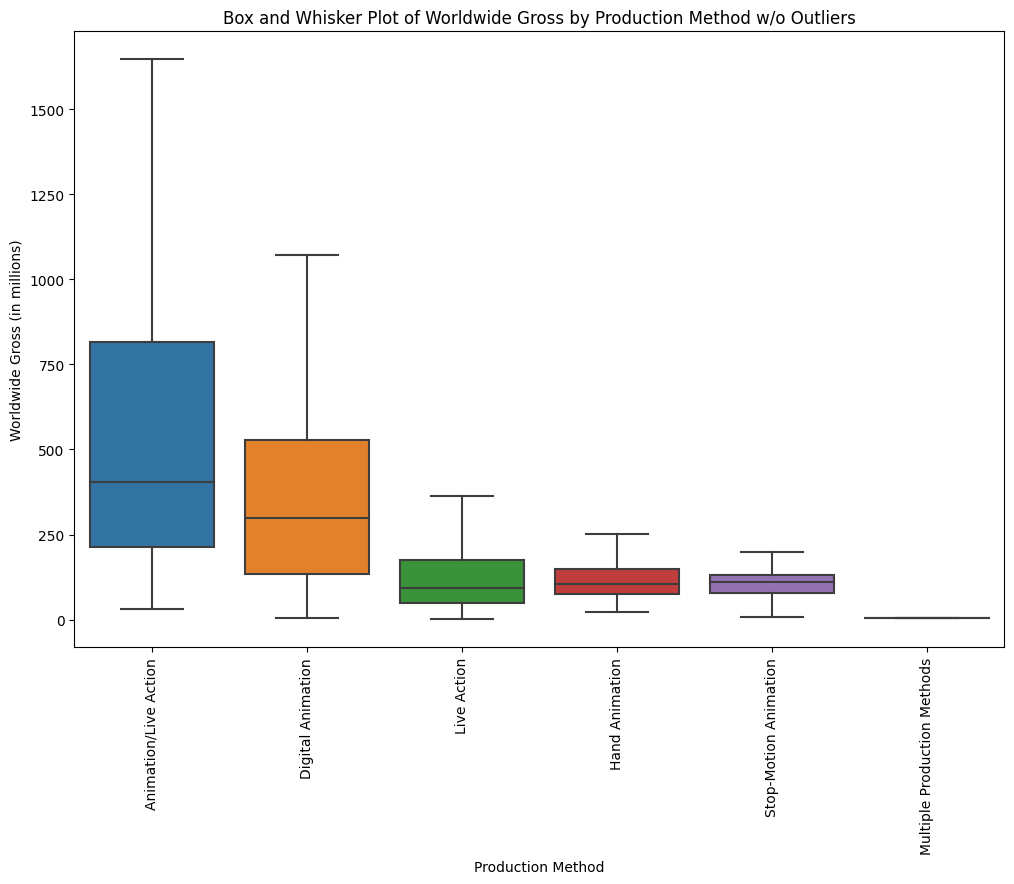

In [ ]:
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='production_method', y='worldwide_gross', data=merged_data, showfliers = False, order=production_method_stats.sort_values(by='mean', ascending=False).index)

# Labels and title
plt.title('Box and Whisker Plot of Worldwide Gross by Production Method w/o Outliers')
plt.xlabel('Production Method')
plt.ylabel('Worldwide Gross (in millions)')
plt.xticks(rotation=90)

# Show plot
plt.show()

 - In our exploration above, `Animation/Live Action` emerges as the most lucrative  production method, earning wise.

 - Even the lower quartile for the `Animation/Live Action` outperforms the medians of all the other production methods.  

- On second number is `Digital Animation` suggesting a strong market for this method as well.

- `Multiple Production Methods` is the least lucrative reflecting that it's a niche and may not be the best option for financial success on a large scale.

#### A Closer Look at `Animation/Live Action` production method
Given that `Animation/Live Action` emerges as the highest-grossing production method in our dataset, we now delve into a more detailed examination of this production method's worldwide gross earnings.



In [ ]:
animated_data = merged_data.loc[(merged_data['production_method']=='Animation/Live Action') | (merged_data['production_method']=='Digital Animation')]

# Counts for each genre
genre_counts = animated_data['genre'].value_counts()

# Counts for each production method
production_method_counts = animated_data['production_method'].value_counts()

# Counts for each creative type
creative_type_counts = animated_data['creative_type'].value_counts()

# Print or display the results
print("Genre Counts:")
print(genre_counts)

print("\nProduction Method Counts:")
print(production_method_counts)

print("\nCreative Type Counts:")
print(creative_type_counts)

animated_data.sort_values(by='worldwide_gross', ascending=False).head(10)


Genre Counts:
Adventure            258
Action                52
Comedy                10
Musical                7
Drama                  3
Thriller/Suspense      3
Romantic Comedy        2
Horror                 2
Name: genre, dtype: int64

Production Method Counts:
Digital Animation        181
Animation/Live Action    156
Name: production_method, dtype: int64

Creative Type Counts:
Kids Fiction            181
Fantasy                  60
Science Fiction          53
Super Hero               27
Contemporary Fiction     12
Historical Fiction        4
Name: creative_type, dtype: int64


,release_date,release_year,title,genre,production_method,creative_type,budget,domestic_gross,international_gross,worldwide_gross,release_month
900,2009-12-18,2009,Avatar,Action,Animation/Live Action,Science Fiction,237.0,785.221649,2138.484377,2923.706026,December
1900,2019-04-26,2019,Avengers: Endgame,Action,Animation/Live Action,Super Hero,400.0,858.373000,1930.539285,2788.912285,April
2201,2022-12-16,2022,Avatar: The Way of Water,Action,Animation/Live Action,Science Fiction,460.0,684.075767,1635.515953,2319.591720,December
1500,2015-12-18,2015,Star Wars Ep. VII: The Force Awakens,Adventure,Animation/Live Action,Science Fiction,306.0,936.662225,1127.953592,2064.615817,December
1801,2018-04-27,2018,Avengers: Infinity War,Action,Animation/Live Action,Super Hero,300.0,678.815482,1369.544272,2048.359754,April
1901,2019-07-19,2019,The Lion King,Adventure,Animation/Live Action,Kids Fiction,260.0,543.638043,1102.468736,1646.106779,July
1200,2012-05-04,2012,The Avengers,Action,Animation/Live Action,Super Hero,225.0,623.357910,891.742301,1515.100211,May
1903,2019-11-22,2019,Frozen II,Adventure,Digital Animation,Kids Fiction,150.0,477.373578,974.279738,1451.653316,November
1502,2015-05-01,2015,Avengers: Age of Ultron,Action,Animation/Live Action,Super Hero,365.0,459.005868,936.311111,1395.316979,May
2301,2023-04-05,2023,The Super Mario Bros. Movie,Action,Digital Animation,Kids Fiction,100.0,574.934330,788.027827,1362.962157,April


From this we can see that `Adventure` genre leads the `Animated/Live Action` films. However, one important observation we can make from the data is `Kids Fiction` creative type also being quite prevalent in the top list. We can look at both these leads one-by-one.

#### **Distribution of Animatd/Live-Action Adventure Films**
Since so far, the most lucrative genre is `Adventure` and the most lucrative production method is `Animation/Live Action`, we analyze the distribution in both in tandem with one another.



In [ ]:
# Create a new column 'title_category' with a default value
merged_data['title_category'] = 'not specified'

# Assign values based on conditions
merged_data['title_category'] = np.where((merged_data['genre'] == 'Adventure') & (merged_data['production_method'] == 'Animation/Live Action'), 'Both', merged_data['title_category'])
merged_data['title_category'] = np.where((merged_data['genre'] == 'Adventure') & (merged_data['production_method'] != 'Animation/Live Action'), 'Adventure', merged_data['title_category'])
merged_data['title_category'] = np.where((merged_data['genre'] != 'Adventure') & (merged_data['production_method'] == 'Animation/Live Action'), 'Animated/Live Action', merged_data['title_category'])

# Print the counts
print(merged_data['title_category'].value_counts())

not specified           1878
Adventure                366
Both                      92
Animated/Live Action      64
Name: title_category, dtype: int64


Adventure               366
Both                     92
Animated/Live Action     64
Name: title_category, dtype: int64


<ipython-input-43-6799aee72e7c>:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data=filtered_data, x='title_category', y='worldwide_gross', palette='tab10', height=6, aspect=2)


<Figure size 1200x800 with 0 Axes>

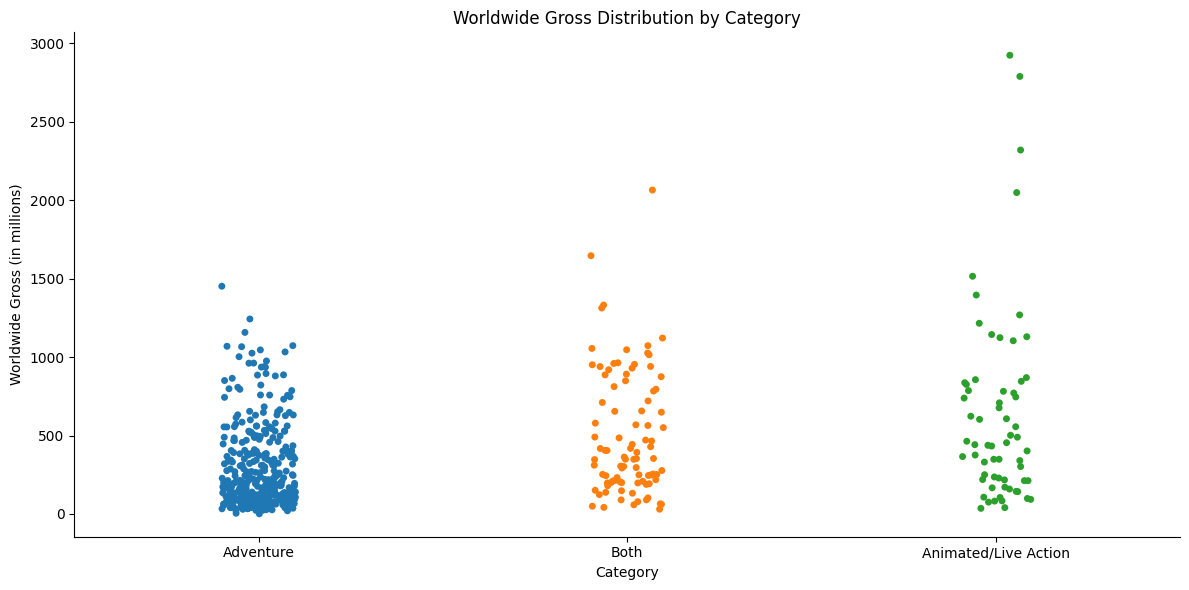

In [ ]:
filtered_data = merged_data[merged_data['title_category'] != 'not specified']

print(filtered_data['title_category'].value_counts())

plt.figure(figsize=(12, 8))

sns.catplot(data=filtered_data, x='title_category', y='worldwide_gross', palette='tab10', height=6, aspect=2)

plt.xlabel('Category')
plt.ylabel('Worldwide Gross (in millions)')
plt.title('Worldwide Gross Distribution by Category')

plt.tight_layout()
plt.show()


Notably, the 'animated/live action' category stands out, showcasing a varied range of movie gross profits. This suggests making a movie with `Animated/Live Action` production method contributes positively to the commercial success of movies. Even Adventure movies with an animated/live action component are more successful than exclusively adventure movies.

Hence, based on the plot above, in order to optimize the chances of achieving high movie gross profits, it is advisable to prioritize the production method—specifically, the incorporation of animated/live action elements—over exclusive emphasis on genre.

#### **Distribution of Animatd/Live-Action Kids Fiction Films**



One important observation among the top animated/live action films was the inclusion of movies like Frozen II. While the dataset has the genre `Adventure` with `Digital Animation`, the movie is also famous for being `Musicals` and we searching on the internet, we see that the movie is listed in both genres. So, we take a closer look at Kids Fiction movies that may also, similar to Frozen II, be partly-Musical.

In [ ]:
digital_animation_data = merged_data.loc[merged_data['production_method'] == 'Digital Animation']
digital_animation_data.sort_values(by = 'worldwide_gross', ascending = False).head(10)

,release_date,release_year,title,genre,production_method,creative_type,budget,domestic_gross,international_gross,worldwide_gross,release_month,title_category
1903,2019-11-22,2019,Frozen II,Adventure,Digital Animation,Kids Fiction,150.0,477.373578,974.279738,1451.653316,November,Adventure
2301,2023-04-05,2023,The Super Mario Bros. Movie,Action,Digital Animation,Kids Fiction,100.0,574.934330,788.027827,1362.962157,April,not specified
1302,2013-11-22,2013,Frozen,Musical,Digital Animation,Kids Fiction,150.0,400.953009,874.037624,1274.990633,November,not specified
1802,2018-06-15,2018,Incredibles 2,Adventure,Digital Animation,Kids Fiction,200.0,608.581744,634.223615,1242.805359,June,Adventure
1505,2015-07-10,2015,Minions,Adventure,Digital Animation,Kids Fiction,74.0,336.045770,821.225989,1157.271759,July,Adventure
1904,2019-06-21,2019,Toy Story 4,Adventure,Digital Animation,Kids Fiction,200.0,434.038008,638.779956,1072.817964,June,Adventure
1000,2010-06-18,2010,Toy Story 3,Adventure,Digital Animation,Kids Fiction,200.0,415.004880,653.874642,1068.879522,June,Adventure
1708,2017-06-30,2017,Despicable Me 3,Adventure,Digital Animation,Kids Fiction,75.0,264.624300,768.185357,1032.809657,June,Adventure
1601,2016-06-17,2016,Finding Dory,Adventure,Digital Animation,Kids Fiction,200.0,486.295561,538.710564,1025.006125,June,Adventure
1606,2016-03-04,2016,Zootopia,Adventure,Digital Animation,Kids Fiction,150.0,341.268248,661.194330,1002.462578,March,Adventure


As expected, a majority of movies that are listed as Kids Fiction adventure movies also have Musical components to them. Particularly Frozen being listed as `Musical` yet its sequel being listed as `Adventure`. All of these are `Kids Fiction` creative_type.

So now, we'll focus on Kids Fiction movies with musical components.

In [ ]:
merged_data['title_category'] = 'not specified'

merged_data['title_category'] = np.where((merged_data['production_method'] == 'Digital Animation') & (merged_data['genre'] == 'Musical'), 'Both', merged_data['title_category'])
merged_data['title_category'] = np.where((merged_data['production_method'] == 'Digital Animation') & (merged_data['genre'] != 'Musical'), 'Animated', merged_data['title_category'])
merged_data['title_category'] = np.where((merged_data['production_method'] != 'Digital Animation') & (merged_data['genre'] == 'Musical'), 'Musical', merged_data['title_category'])

print(merged_data['title_category'].value_counts())

not specified    2189
Animated          179
Musical            30
Both                2
Name: title_category, dtype: int64


Animated    179
Musical      30
Both          2
Name: title_category, dtype: int64


<ipython-input-46-6799aee72e7c>:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data=filtered_data, x='title_category', y='worldwide_gross', palette='tab10', height=6, aspect=2)


<Figure size 1200x800 with 0 Axes>

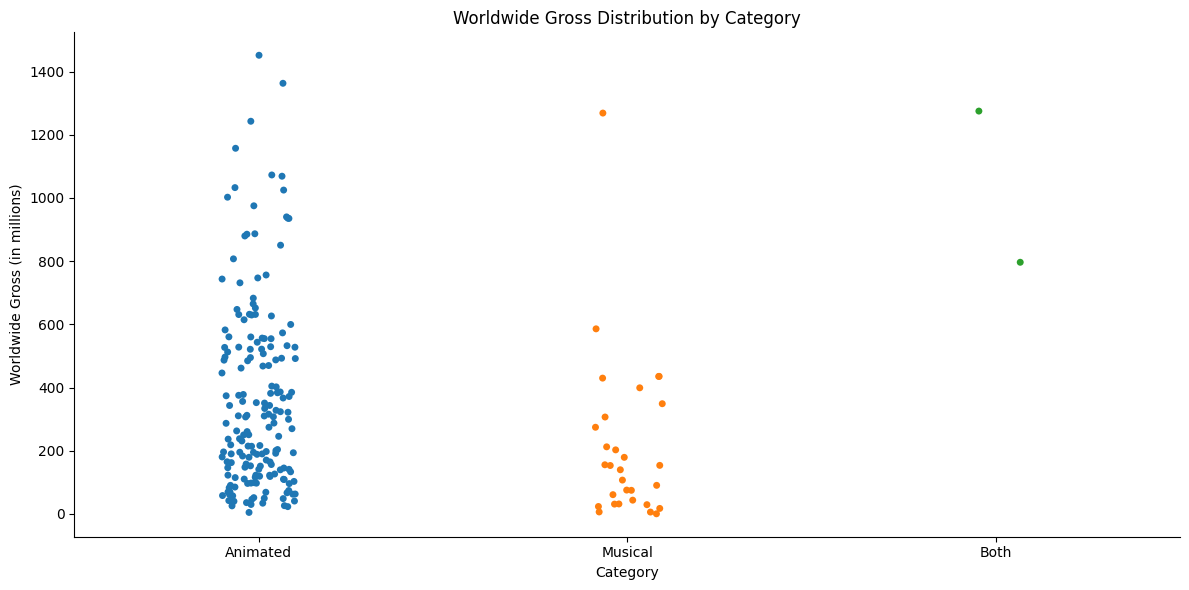

In [ ]:
filtered_data = merged_data[merged_data['title_category'] != 'not specified']

print(filtered_data['title_category'].value_counts())

plt.figure(figsize=(12, 8))

sns.catplot(data=filtered_data, x='title_category', y='worldwide_gross', palette='tab10', height=6, aspect=2)

plt.xlabel('Category')
plt.ylabel('Worldwide Gross (in millions)')
plt.title('Worldwide Gross Distribution by Category')

plt.tight_layout()
plt.show()


From this we can see that it is recommended to broaden the horizon from exclusively musical movies to animated movies with a musical component. Also it is important to remember that all of these movies were Kids Fiction movies.

# **Movie Type Recommendations**
Based on the data trends, we have two recommendations regarding movie type:
## **Recommendation # 1**
  + An `Adventure` `SuperHero` movie that is `Animated/Live Action`,

## **Recommendation # 2**
  + An `Animated` `Kids Fiction` movie that has a musical component to it.  

# Now with `creative_type`, `genre`, and `production_method` recommended, we'll focus on analysis for Production decisions

#**Data Visualisation and Analysis (Post-Production)**
Having shot the movie, now it is time to decide when to release it.

**Plotting the number of release per month**

December     267
November     241
August       211
October      208
July         208
June         206
March        200
February     191
September    180
May          170
April        170
January      148
Name: release_month, dtype: int64


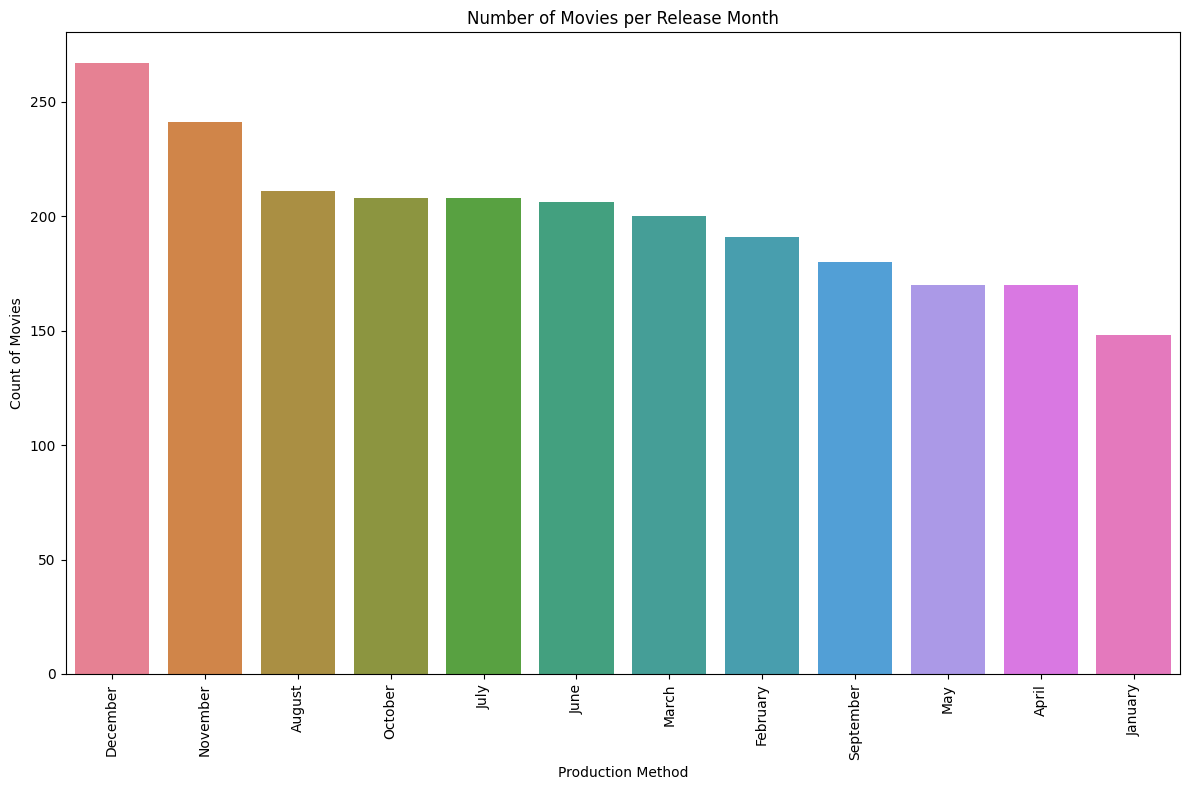

In [ ]:
value_counts = merged_data['release_month'].value_counts()
print(value_counts)

plt.figure(figsize=(12, 8))

# Create the bar plot
sns.countplot(data=merged_data, x='release_month', order=value_counts.index, palette='husl')


# Labels and Title
plt.title('Number of Movies per Release Month')
plt.xlabel('Production Method')
plt.ylabel('Count of Movies')
plt.xticks(rotation=90)

plt.tight_layout()

# Show the plot
plt.show()

As we can see, the movie releases are fairly distributed with most of the releases in December and November.

In [ ]:
release_month_stats = merged_data.groupby('release_month')['worldwide_gross'].agg(['median', 'mean', 'std'])
release_month_stats.sort_values(by='mean', ascending=False)

,median,mean,std
release_month,,,
May,232.165655,337.878706,327.709974
July,162.377352,276.017019,299.571114
June,194.945447,270.205785,282.693634
December,134.612435,239.856989,344.850610
November,141.484812,232.012144,257.522058
March,101.227225,174.609394,201.830239
April,79.732315,169.449861,327.815917
October,92.997040,132.099769,145.707685
February,78.353508,128.753498,151.562187


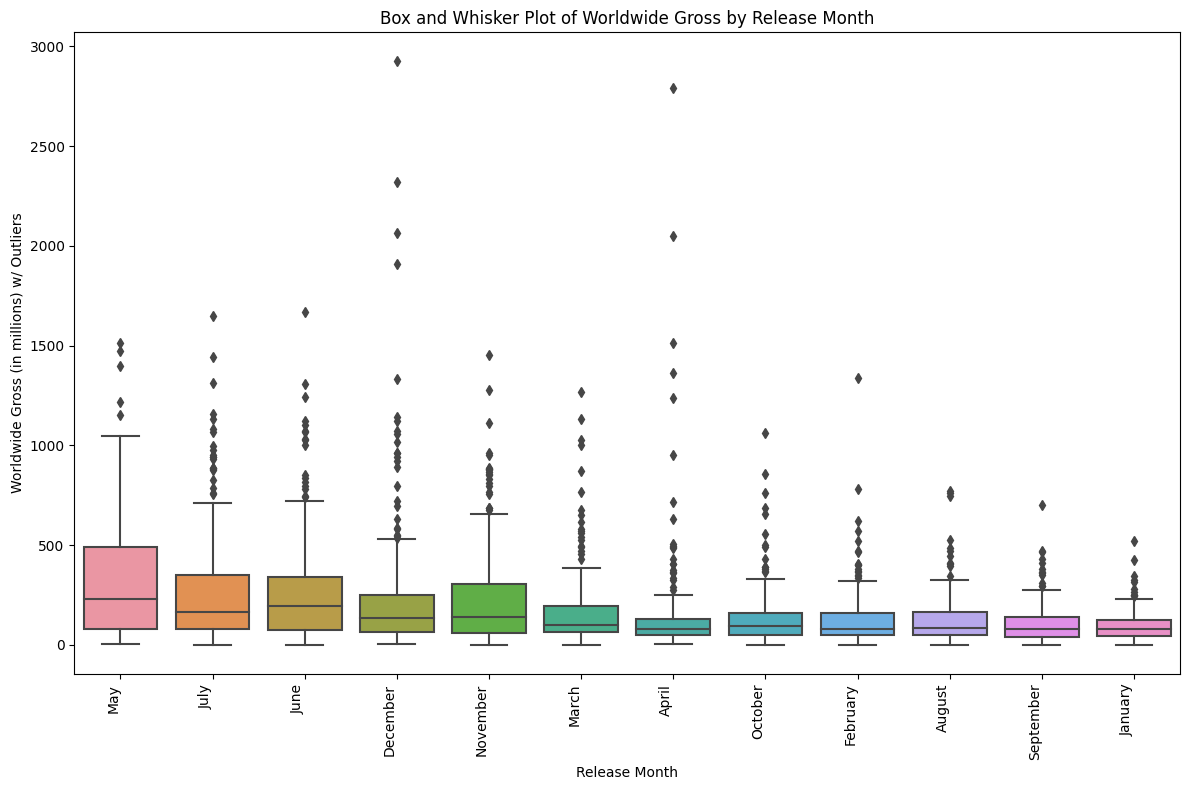

In [ ]:
plt.figure(figsize=(12, 8))

# Box Plot
sns.boxplot(x='release_month', y='worldwide_gross', data=merged_data, showfliers = True, order=release_month_stats.sort_values(by='mean', ascending=False).index)

# Title and labels
plt.title('Box and Whisker Plot of Worldwide Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross (in millions) w/ Outliers')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()

# Show the plot
plt.show()

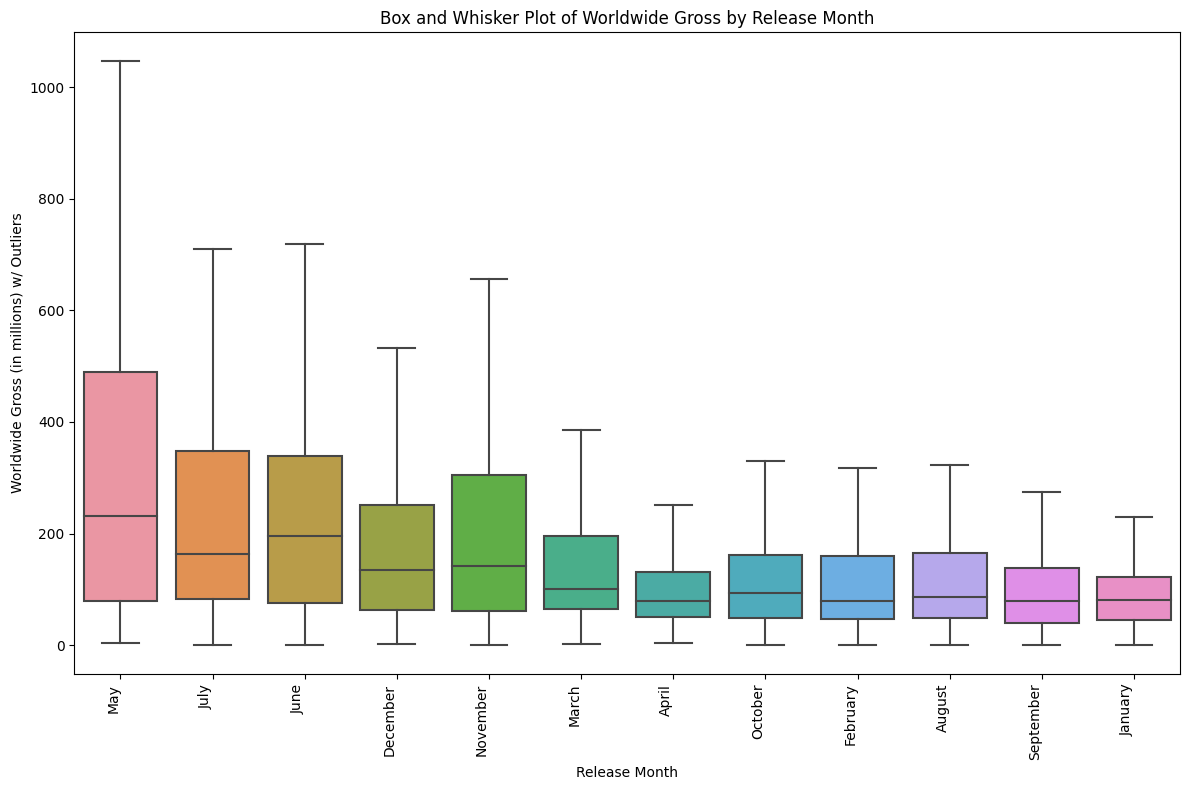

In [ ]:
plt.figure(figsize=(12, 8))

# Box Plot
sns.boxplot(x='release_month', y='worldwide_gross', data=merged_data, showfliers = False, order=release_month_stats.sort_values(by='mean', ascending=False).index)

# Title and labels
plt.title('Box and Whisker Plot of Worldwide Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross (in millions) w/ Outliers')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()

# Show the plot
plt.show()

Based on this, May, July, and June seem to be the most profitable months with the highest mean values for the worldwide box office gross. But now that we have decided our movie type, we'll see how much does the type of the movie impact the time of the year that a movie does best, specifically what is the best time to release **our** movie, instead of a generalized idea.

Since we recommend either a SuperHero movie or an Animated movie, we'll plot the worldwide gross for these recommendations, spread across the release months.

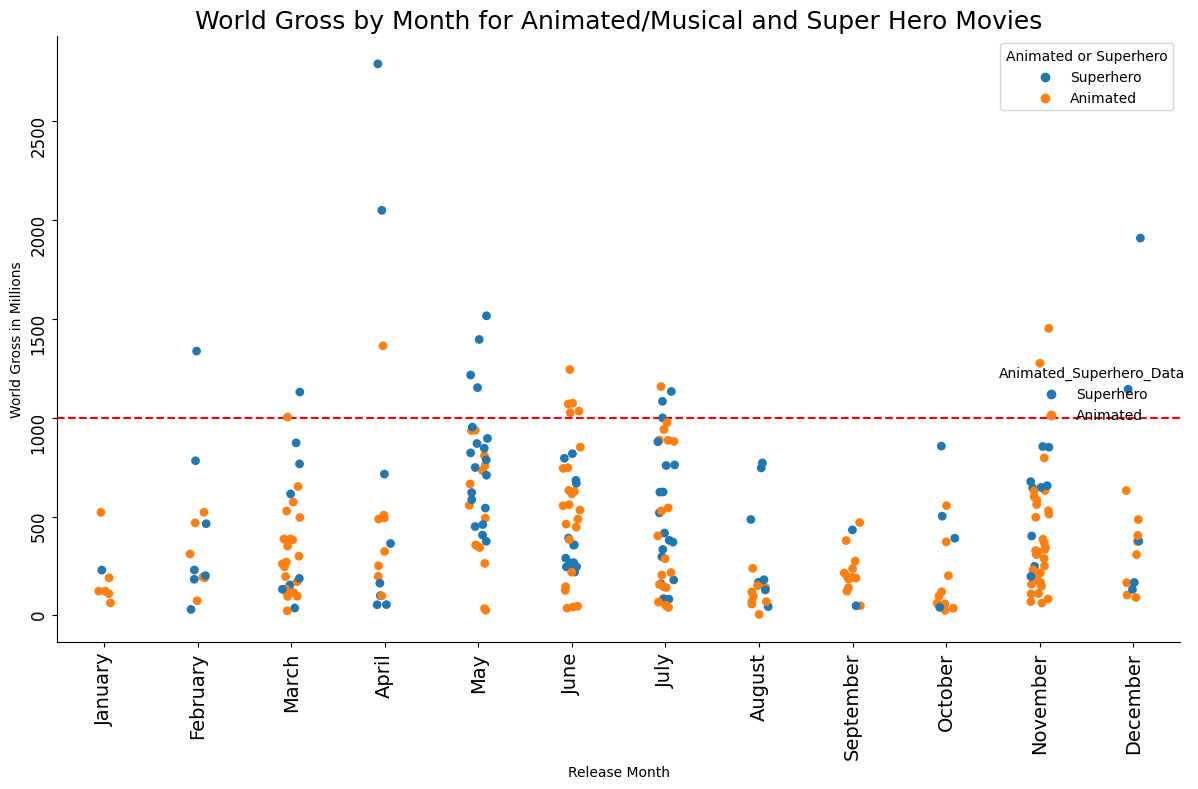

In [ ]:
# Create a column for titles that are either animated or superhero
merged_data['Animated_Superhero_Data'] = ''
merged_data.loc[merged_data['production_method'] == 'Digital Animation', 'Animated_Superhero_Data'] = 'Animated'
merged_data.loc[merged_data['creative_type'] == 'Super Hero', 'Animated_Superhero_Data'] = 'Superhero'

# Filter data for only superhero or animated titles
filtered_data = merged_data[merged_data['Animated_Superhero_Data'].isin(['Animated', 'Superhero'])]

# Define months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a strip plot
plot = sns.catplot(
    data=filtered_data,
    kind="strip",
    x="release_month",
    y="worldwide_gross",
    order=months,
    hue="Animated_Superhero_Data",
    s=40,
)

plot.fig.set_size_inches(12, 8)

# Labels
plt.title('World Gross by Month for Animated/Musical and Super Hero Movies', fontsize=18)
plt.xlabel('Release Month')
plt.ylabel('World Gross in Millions')

plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=90, fontsize=12)

plt.legend(title='Animated or Superhero', loc='upper right')

# Add a horizontal line to signify the billion dollar mark
plt.axhline(y=1000, ls='--', c='red')


plt.tight_layout()
plt.show()


Through this plot, we can see that while SuperHero movies seem to do the best in April and May, Animated movies do the best in June, July, and November.

##**Closer Look at SuperHero Movie Release**


In [ ]:
superhero_months = merged_data.loc[merged_data['Animated_Superhero_Data']=='Superhero']
superhero_months_gross = superhero_months['worldwide_gross'].groupby(superhero_months['release_month']).agg(['median', 'mean', 'std'])
superhero_months_gross.sort_values(by='mean', ascending=False)

,median,mean,std
release_month,,,
May,786.362370,807.521382,327.531260
April,263.161672,785.788935,1050.101007
December,375.464627,744.954596,767.974520
November,647.263005,575.078853,239.840788
July,467.657650,537.667316,338.190055
March,400.589282,486.599281,411.329816
February,229.545589,460.775448,457.133049
October,445.935388,447.202094,335.900383
June,322.444498,417.460671,220.843830


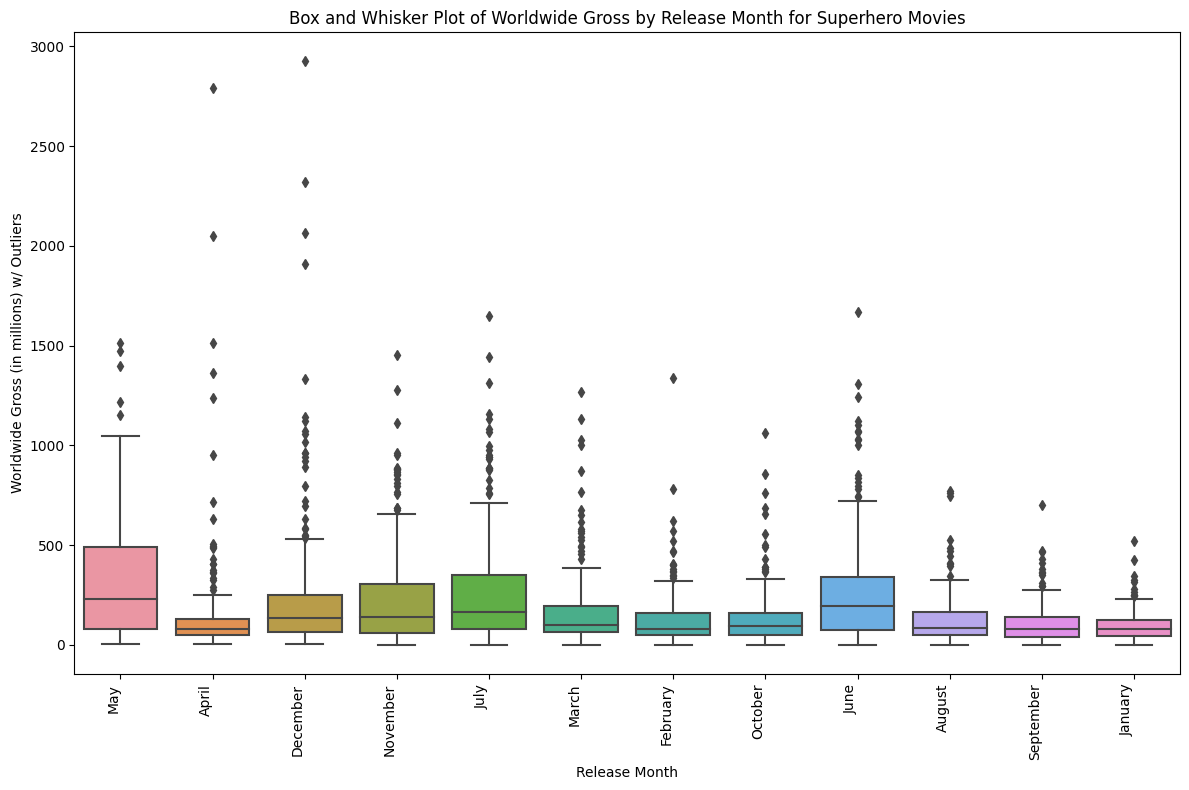

In [ ]:
plt.figure(figsize=(12, 8))

# Box Plot
sns.boxplot(x='release_month', y='worldwide_gross', data=merged_data, showfliers = True, order=superhero_months_gross.sort_values(by='mean', ascending=False).index)

# Title and labels
plt.title('Box and Whisker Plot of Worldwide Gross by Release Month for Superhero Movies')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross (in millions) w/ Outliers')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()

# Show the plot
plt.show()

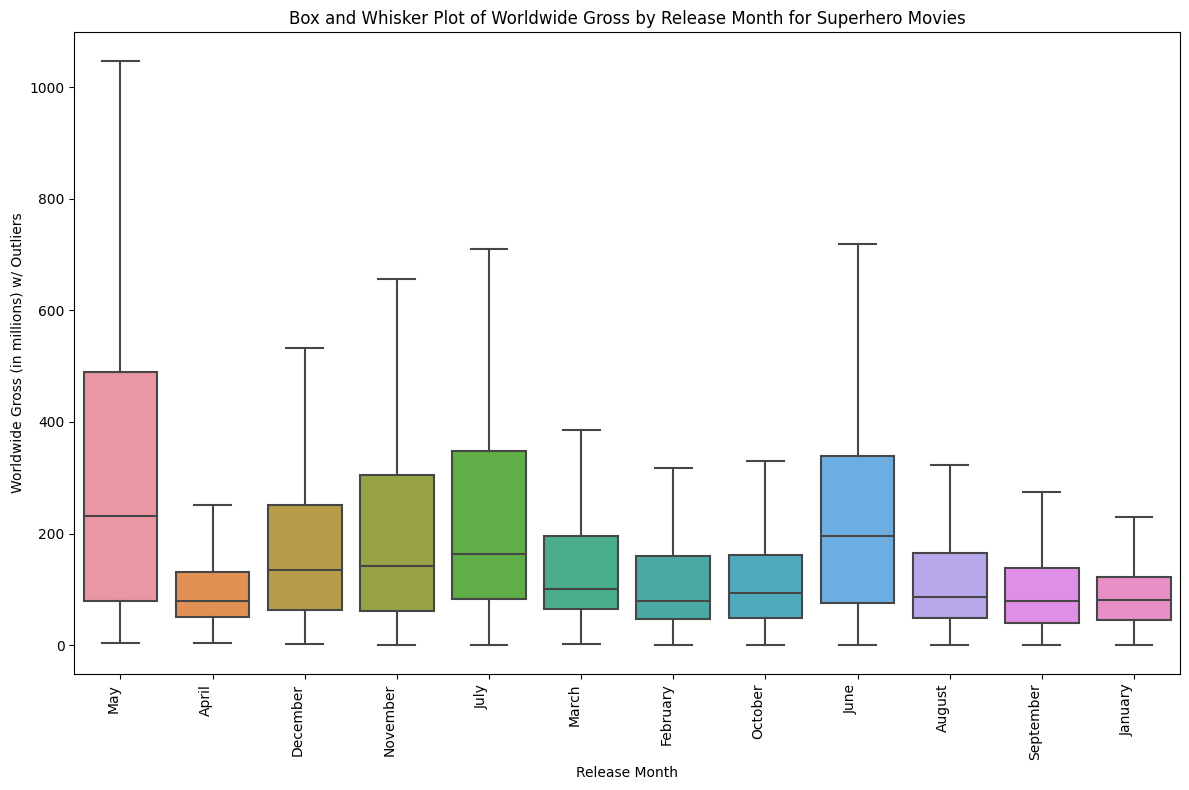

In [ ]:
plt.figure(figsize=(12, 8))

# Box Plot
sns.boxplot(x='release_month', y='worldwide_gross', data=merged_data, showfliers = False, order=superhero_months_gross.sort_values(by='mean', ascending=False).index)

# Title and labels
plt.title('Box and Whisker Plot of Worldwide Gross by Release Month for Superhero Movies')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross (in millions) w/ Outliers')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()

# Show the plot
plt.show()

After a closer look, we can confirm that May and June are the highest-grossing months for a Superhero movie release.

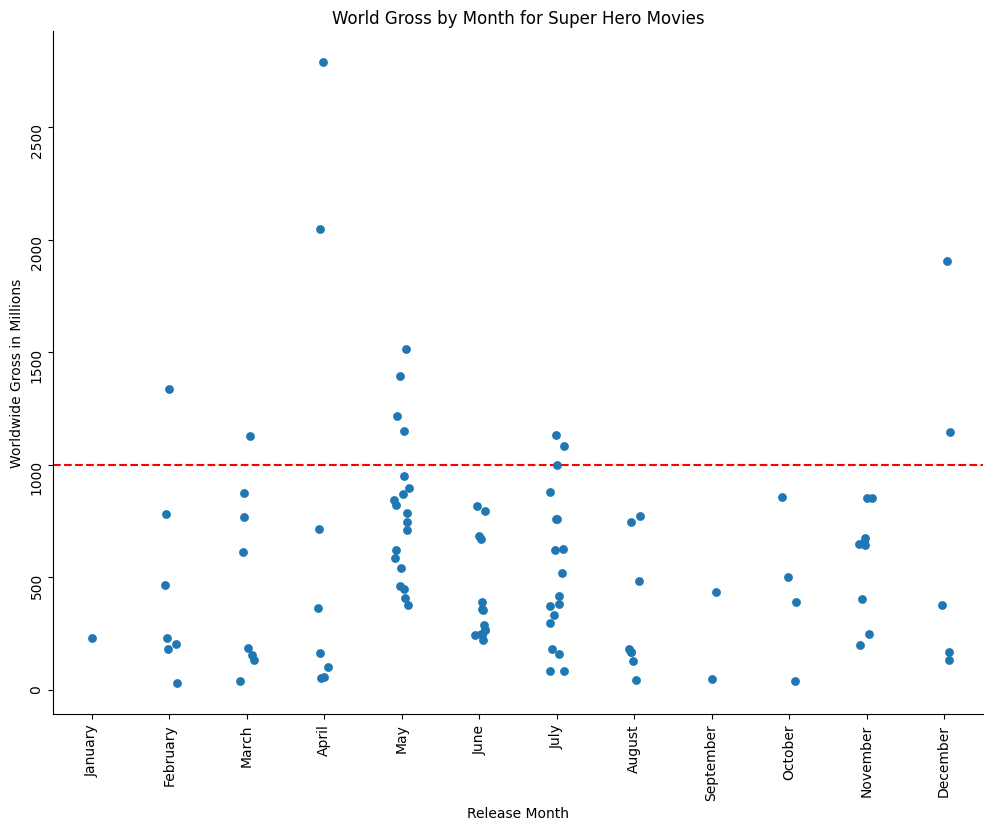

In [ ]:
plot = sns.catplot(
    data=merged_data.loc[merged_data['creative_type']=='Super Hero'],
    kind="strip",
    x="release_month",
    y="worldwide_gross",
    order=months,
    s=40
    )


plot.fig.set_size_inches(12,8)


plt.title('World Gross by Month for Super Hero Movies')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross in Millions')

plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.axhline(y=1000, ls='--', c='red');

Most of the super hero movies over the one-billion mark were released in May. The two highest-grossing ones were released in April. There were a couple released in other months as well.

##**Closer Look at Animated Movie Release**


In [ ]:
animated_months = merged_data.loc[merged_data['Animated_Superhero_Data']=='animated']
animated_months_gross = superhero_months['worldwide_gross'].groupby(superhero_months['release_month']).agg(['median', 'mean', 'std'])
animated_months_gross.sort_values(by='mean', ascending=False)

,median,mean,std
release_month,,,
May,786.362370,807.521382,327.531260
April,263.161672,785.788935,1050.101007
December,375.464627,744.954596,767.974520
November,647.263005,575.078853,239.840788
July,467.657650,537.667316,338.190055
March,400.589282,486.599281,411.329816
February,229.545589,460.775448,457.133049
October,445.935388,447.202094,335.900383
June,322.444498,417.460671,220.843830


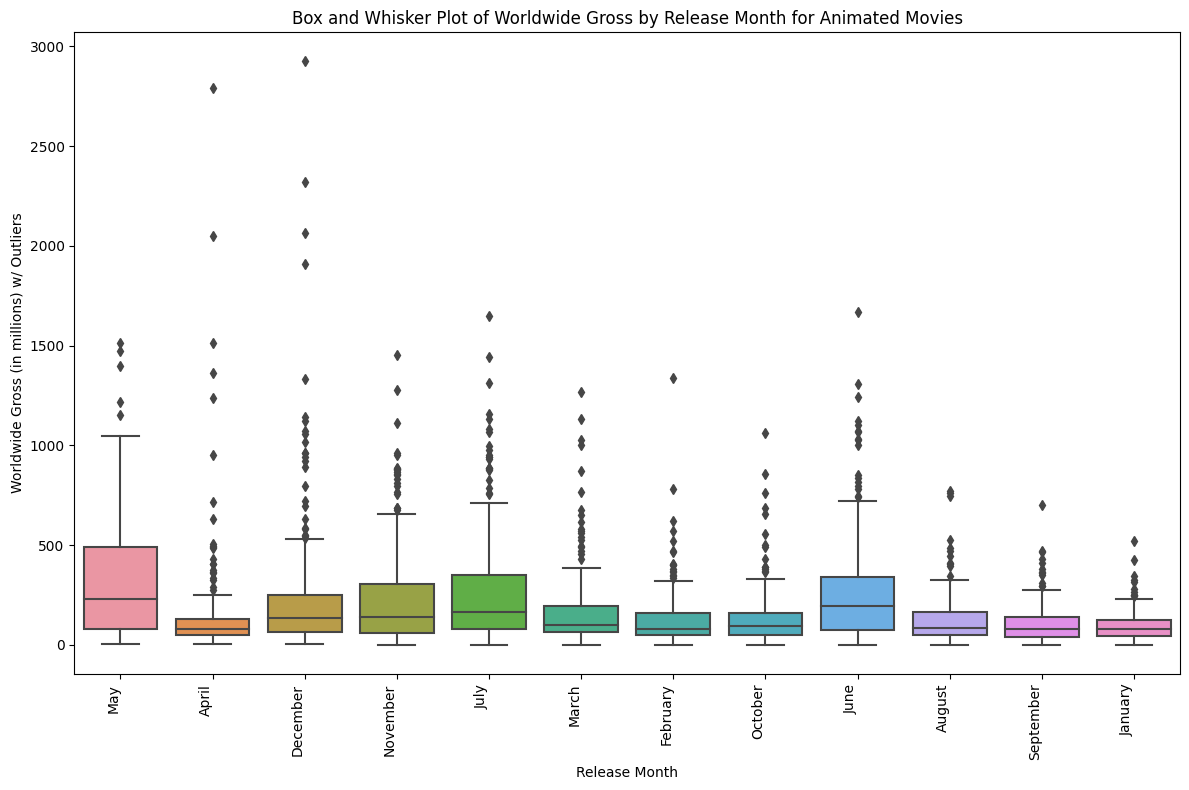

In [ ]:
plt.figure(figsize=(12, 8))

# Box Plot
sns.boxplot(x='release_month', y='worldwide_gross', data=merged_data, showfliers = True, order=animated_months_gross.sort_values(by='mean', ascending=False).index)

# Title and labels
plt.title('Box and Whisker Plot of Worldwide Gross by Release Month for Animated Movies')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross (in millions) w/ Outliers')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()

# Show the plot
plt.show()

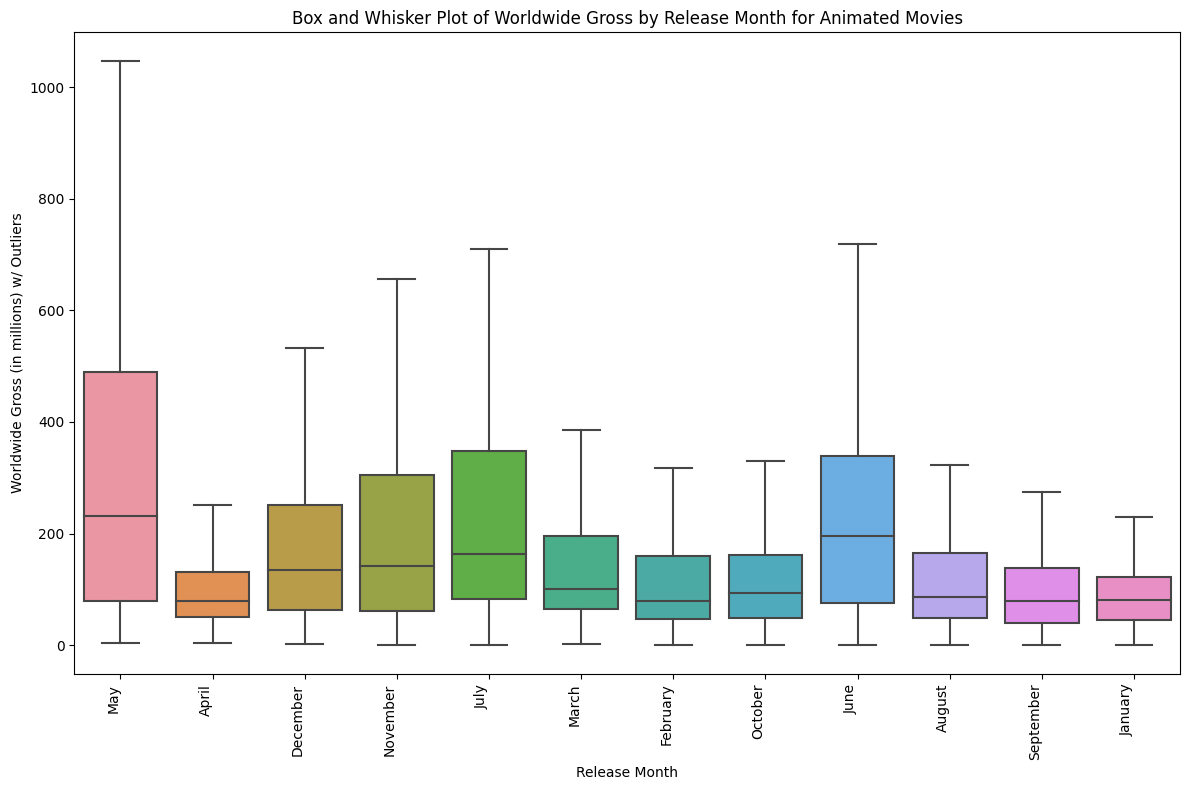

In [ ]:
plt.figure(figsize=(12, 8))

# Box Plot
sns.boxplot(x='release_month', y='worldwide_gross', data=merged_data, showfliers = False, order=animated_months_gross.sort_values(by='mean', ascending=False).index)

# Title and labels
plt.title('Box and Whisker Plot of Worldwide Gross by Release Month for Animated Movies')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross (in millions) w/ Outliers')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()

# Show the plot
plt.show()

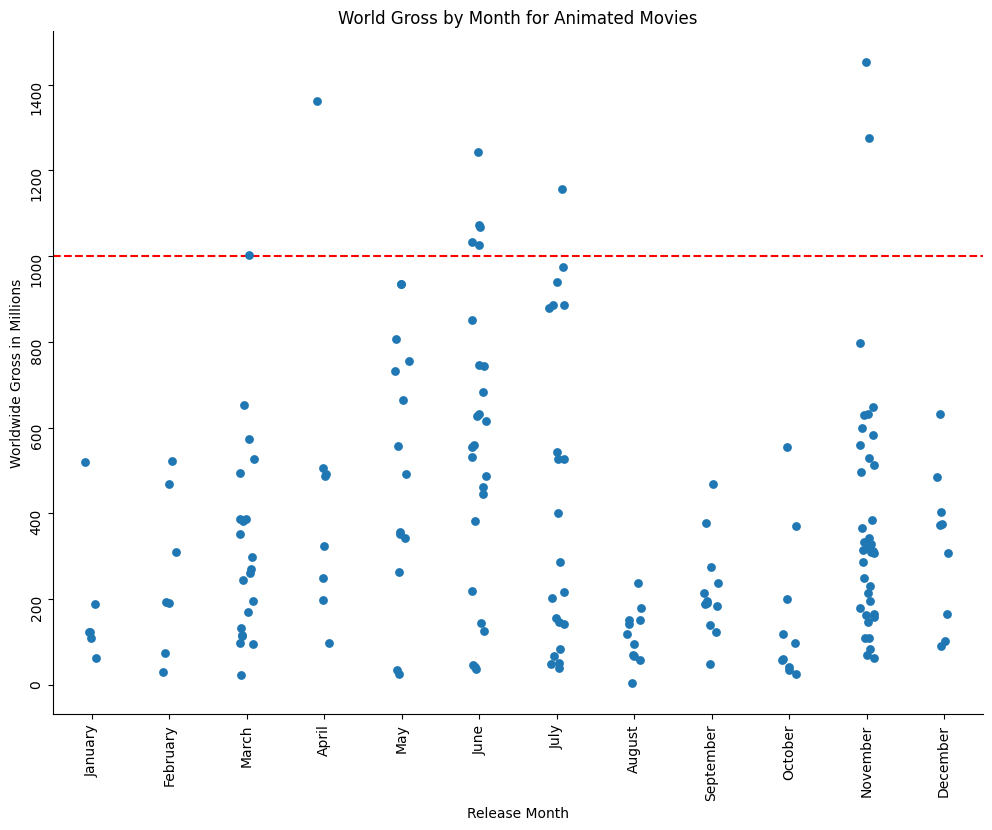

In [ ]:
plot = sns.catplot(
    data=merged_data.loc[merged_data['production_method']=='Digital Animation'],
    kind="strip",
    x="release_month",
    y="worldwide_gross",
    order=months,
    s=40
    )


plot.fig.set_size_inches(12,8)


plt.title('World Gross by Month for Animated Movies')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross in Millions')

plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.axhline(y=1000, ls='--', c='red');

Most of the animated movies over the one-billion mark were released in June. The two of the highest-grossing ones were released in November and April respectively. There were a couple released in other months as well.

# **Release Month Recommendations**
Based on the data trends, we have two recommendations regarding movie type:
## **Recommendation # 1**
  + An `Adventure` `SuperHero` movie that is `Animated/Live Action` in `April` or `May`

## **Recommendation # 2**
  + An `Animated` `Kids Fiction` movie that has a musical component to it in `June` or `November`  

#**Data Visualisation and Analysis (Production)**
This section primarily explores how the budget impacts the box office gross.


Considering the adage, ***'to make money, you gotta spend money,'*** our initial step involves conducting a correlation analysis to identify strong associations within the numerical data, particularly focusing on production budgets. This exploration aims to unveil potential patterns or relationships that could guide strategic financial in film production.

<ipython-input-60-1e0b9179a03e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


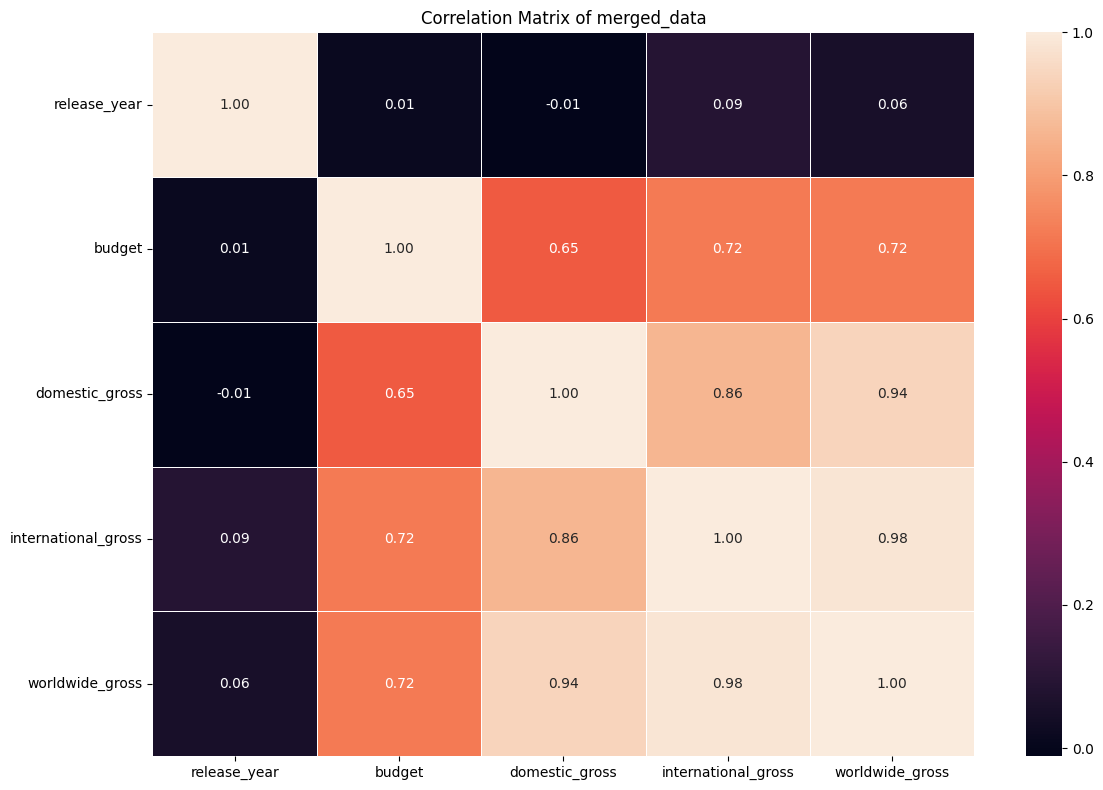

In [ ]:
# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)

# Set title
plt.title('Correlation Matrix of merged_data')

plt.tight_layout()

# Show the plot
plt.show()

- It is clear that there exists a strong correlation between the production budget and gross on all scales (worldwide, domestic, and international). This indicates that as the budget increases, the gross profits tend to increase as well.

- There is also a strong correlation between the markets (domestic and international). This suggests that movies that perform well in one market tend to perform well in other markets too.

- The release year shows a very weak correlation with the financial metrics, indicating that there is no clear linear relationship between the release year and budget or gross profits.

**Budget vs Gross:** To further confirm this correlation, we can draw up a regression plot to visualize the linear relationship.

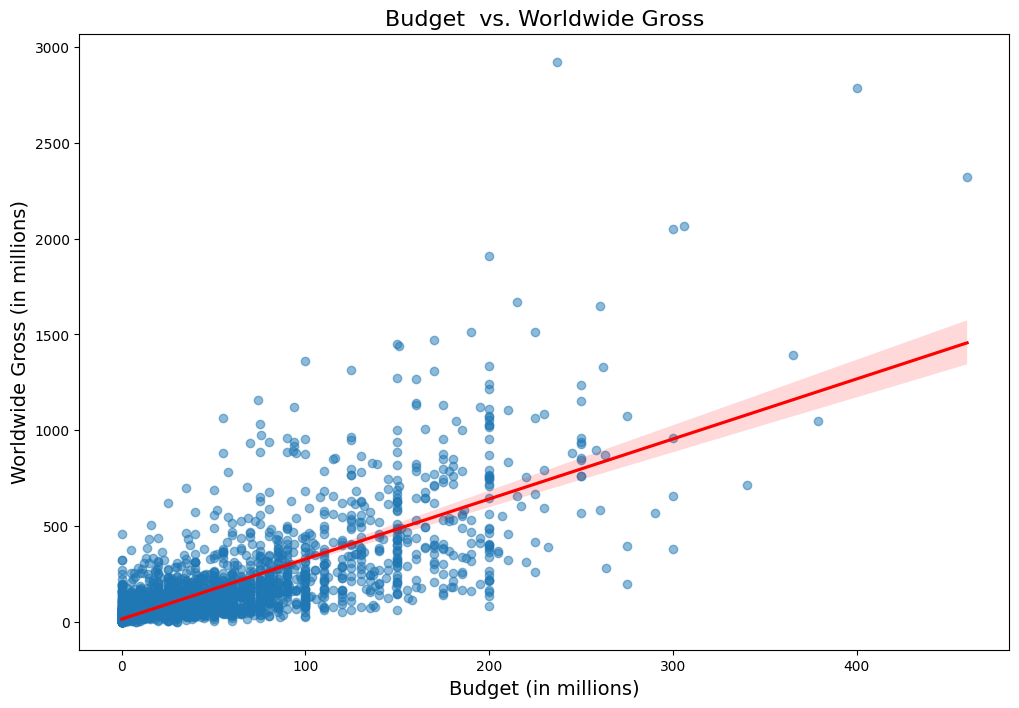

In [ ]:
# Create a regression plot
plt.figure(figsize=(12, 8))
sns.regplot(data=merged_data, x='budget', y='worldwide_gross', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Title and labels
plt.title('Budget  vs. Worldwide Gross', fontsize=16)
plt.xlabel('Budget (in millions)', fontsize=14)
plt.ylabel('Worldwide Gross (in millions)', fontsize=14)

# Show the plot
plt.show()

As we can see, the regression line has a consistently positive gradient. This shows that, on average, as the budget allocated for a movie increases, there is a tendency for the worldwide gross to also increase.

#### **World Gross vs Budget for Animated and Superhero Movies**
This section explores how the budget impacts the box office gross for the superhero and animated movies.


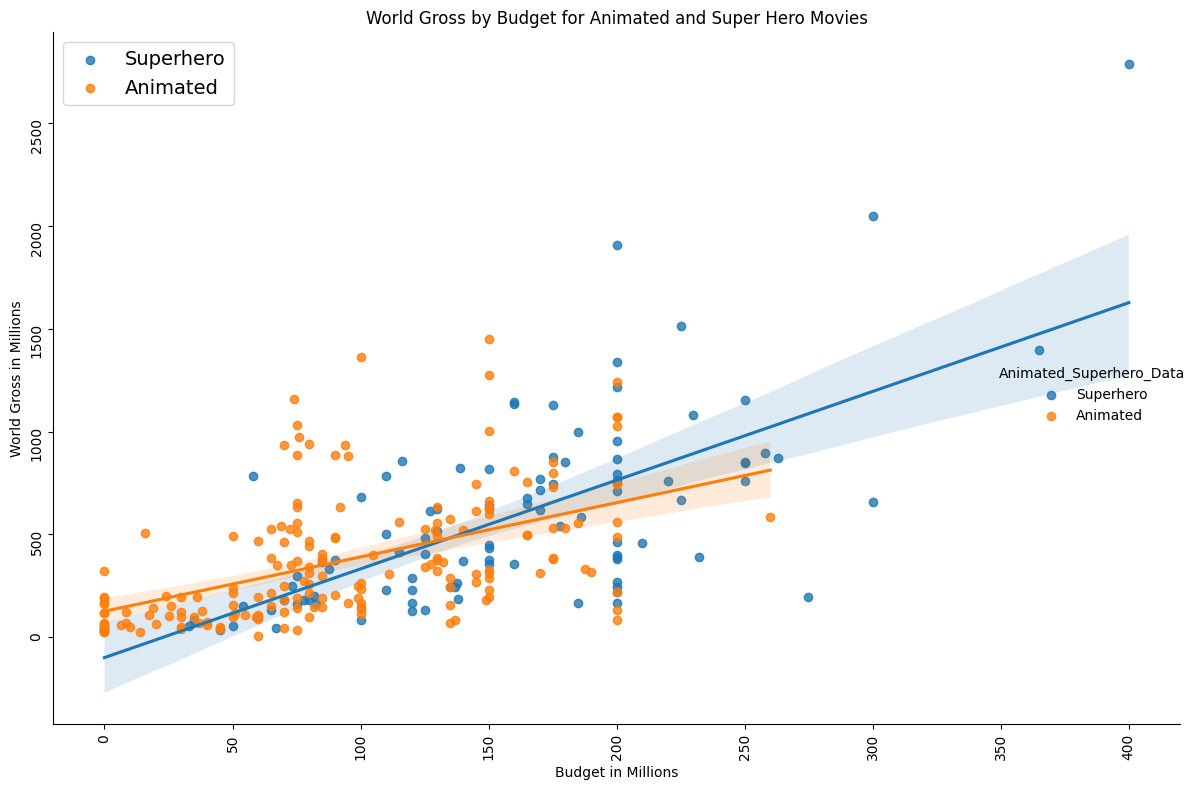

In [ ]:
filtered_data = merged_data[merged_data['Animated_Superhero_Data'].isin(['Animated', 'Superhero'])]


plot = sns.lmplot(
    x='budget',
    y='worldwide_gross',
    data=filtered_data,
    hue='Animated_Superhero_Data'
    )

plt.title('World Gross by Budget for Animated and Super Hero Movies')
plt.xlabel('Budget in Millions')
plt.ylabel('World Gross in Millions')

plt.xticks(rotation=90)
plt.yticks(rotation=90)

plot.fig.set_size_inches(12,8)

plt.tight_layout()
plt.legend(loc='upper left', fontsize=14)

We can see that super hero movies benefit from a very large budget, while animated movies benefit from a moderately large budget. Overall, both lines show that as the budget increases, the worldwide gross earnings tend to increase as well.

##### **World Gross vs Budget for Animated Movies**


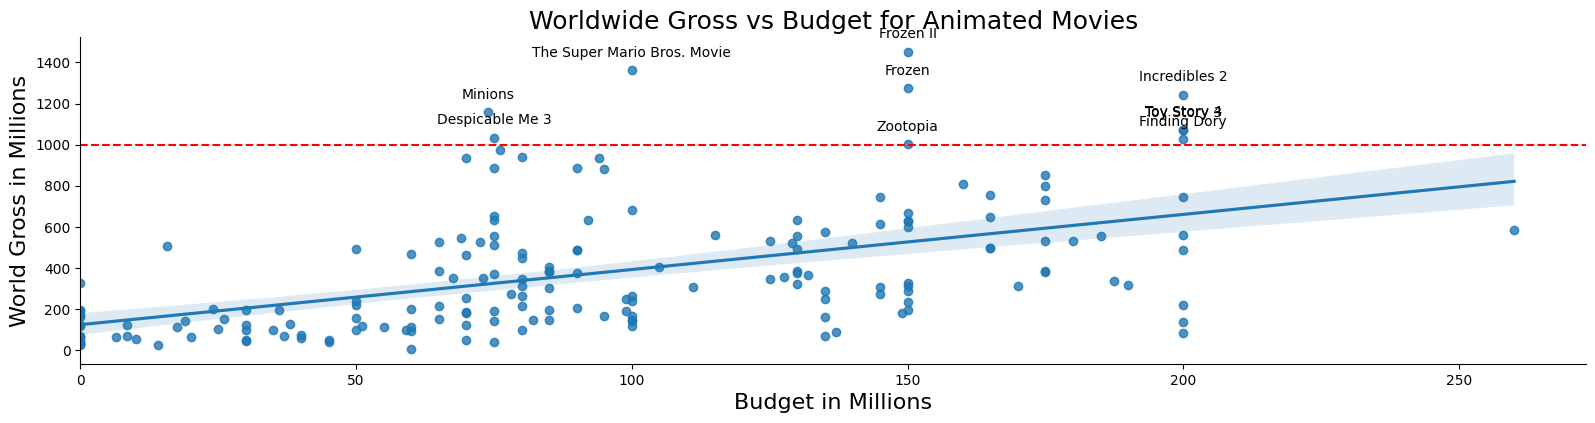

In [ ]:
# Create a scatter plot with a linear regression line
sns.lmplot(x='budget', y='worldwide_gross', data=merged_data.loc[merged_data['production_method']=='Digital Animation'], height=4, aspect=4)

# Set plot title and axis labels
plt.title('Worldwide Gross vs Budget for Animated Movies', fontsize=18)
plt.xlabel('Budget in Millions', fontsize=16)
plt.ylabel('World Gross in Millions', fontsize=16)

plt.xlim(0, None)

# Add a horizontal dashed line at 1 billion marks
plt.axhline(y=1000, ls='--', c='red')

# Annotate points above the billion dollar mark
for index, row in merged_data.loc[merged_data['production_method']=='Digital Animation'].iterrows():
    if row['worldwide_gross'] > 1000:
        plt.annotate(row['title'], (row['budget'], row['worldwide_gross']), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.show()

In [ ]:
merged_data.loc[merged_data['production_method']=='Digital Animation', 'budget'].describe()

count    181.000000
mean      92.346685
std       58.509131
min        0.000000
25%       50.000000
50%       82.000000
75%      137.000000
max      260.000000
Name: budget, dtype: float64

1. Most of the high-earning movies have budgets under 200 million.
2. There are several movies with high budgets that did not achieve proportional worldwide gross, indicating diminishing returns beyond a certain budget level.
3.  For a safe investment, the company might consider aiming for the budget range where the majority of movies seem to have done well, without going too high where the risk of not recouping the investment increases.
4. The average budget is approximately 91.8 million. This could be a starting point for considering the budget, but it's essential to look at other statistics for a more nuanced decision.

Considering the median of 80 million dollar, aiming for a budget around the median can be a safe approach. Also, since the 75th percentile is at $137 million, and considering the plot where we saw diminishing returns beyond a certain budget level, the optimal budget would likely be between the median and the 75th percentile.

**Taking these factors into account, an optimal budget might be in the range of $80-120 million.**




##### **World Gross vs Budget for Superhero Movies**




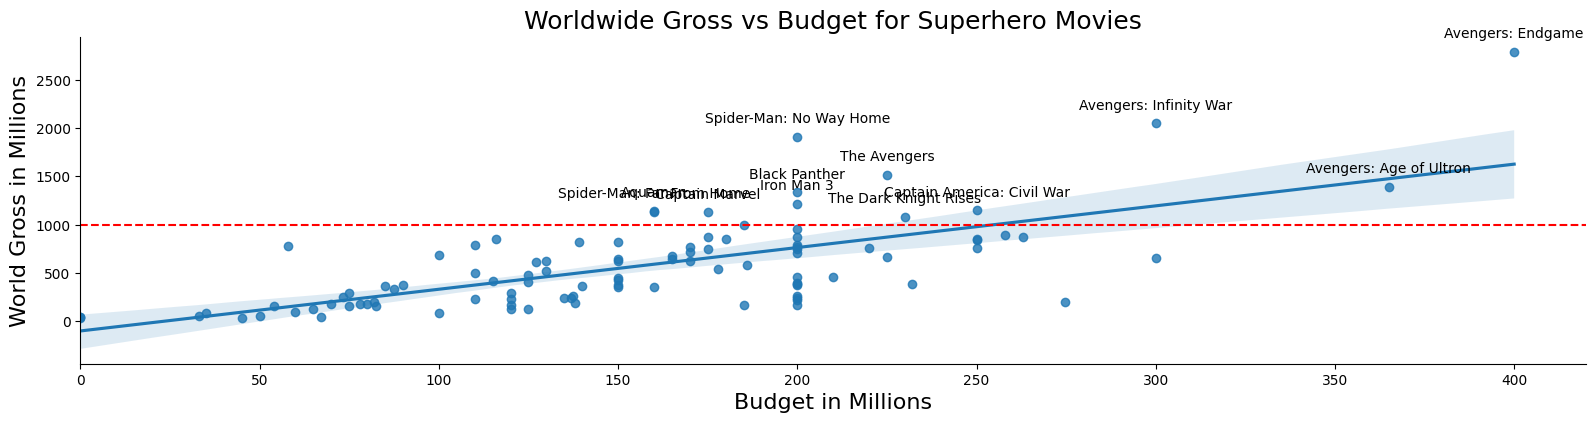

In [ ]:
# Create a scatter plot with a linear regression line
sns.lmplot(x='budget', y='worldwide_gross', data=merged_data.loc[merged_data['creative_type']=='Super Hero'], height=4, aspect=4)

# Set plot title and axis labels
plt.title('Worldwide Gross vs Budget for Superhero Movies', fontsize=18)
plt.xlabel('Budget in Millions', fontsize=16)
plt.ylabel('World Gross in Millions', fontsize=16)

plt.xlim(0, None)

# Add a horizontal dashed line at 1 billion marks
plt.axhline(y=1000, ls='--', c='red')

# Annotate points above the billion dollar mark
for index, row in merged_data.loc[merged_data['creative_type']=='Super Hero'].iterrows():
    if row['worldwide_gross'] > 1000:
        plt.annotate(row['title'], (row['budget'], row['worldwide_gross']), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.show()

In [ ]:
merged_data.loc[merged_data['creative_type']=='Super Hero', 'budget'].describe()

count    103.000000
mean     154.238283
std       73.182703
min        0.000000
25%      110.000000
50%      150.000000
75%      200.000000
max      400.000000
Name: budget, dtype: float64

1. Mean Budget: Approximately 153.28 million.
2. Median Budget: 150 million.
3. Maximum Budget: 400 million.
4. 75th Percentile: 200 million, suggesting that 75% of the movies have a budget at or below this level.

Considering these statistics and the fact that superhero movies often rely on high-quality special effects, star actors, and extensive marketing campaigns, the optimal budget will likely be higher than that for animated films.

The scatter plot also likely shows a positive correlation between the budget and worldwide gross for superhero movies, with several movies earning well above the $1 billion mark, which is a high success benchmark.

Given this data:
1. Lower Risk Budget: If the company aims to be more conservative, it might consider a budget close to the median of $200 million, which is representative of a typical superhero movie budget.

2. Higher Potential Budget: To be competitive and aim for higher earnings (since the dataset shows multiple movies earning above 1 billion), the company might consider a budget closer to the 75th percentile, around $300 million. This would allow for a high-quality production that can attract large audiences without going to the extremes of the highest budgets in the dataset.

3. Considering High Earnings: Noting that several films have crossed the billion-dollar mark, if the company aims for a blockbuster of that caliber, they might justify a budget even closer to the maximum, provided they have a strong enough script, cast, and marketing strategy to support the investment.


Therefore, an optimal budget could be suggested between 200 million and 400 million, balancing the elements of production quality, potential high earnings, and financial risk.


# **Budget Recommendations**
Based on the data trends, we have two recommendations regarding movie type:
## **Recommendation # 1**
  + An `Adventure` `SuperHero` movie with budget of `$200-$300 million`

## **Recommendation # 2**
  + An `Animated` `Kids Fiction` movie with budget of `$80-$120 million`

________________________________________________________________________________
# **Final Recommendations**
1. Release an `Adventure Super Hero` movie in `April` or `May` with a budget of `$200 - $400 million`.
2. Release an `Animated Kids Fiction` movie in `June` or `November` with a budget of `$80 - $120 million`.
________________________________________________________________________________

# Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

X = merged_data.drop(columns=['worldwide_gross', 'title', 'release_date', 'domestic_gross', 'international_gross'])
y = merged_data['worldwide_gross']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# One-hot encoding for categorical variables and scaling for numerical variables
categorical_features = ['genre', 'production_method', 'creative_type', 'release_month']
numerical_features = ['release_year', 'budget']  # Updated list

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

X_train_array = preprocessor.fit_transform(X_train).toarray()
X_test_array = preprocessor.transform(X_test).toarray()

# Neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_array.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_array, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_array)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Epoch 1/50
48/48 [==============================] - 4s 33ms/step - loss: 104707.6172 - val_loss: 97025.7500
Epoch 2/50
48/48 [==============================] - 0s 10ms/step - loss: 82501.5859 - val_loss: 49642.0625
Epoch 3/50
48/48 [==============================] - 1s 13ms/step - loss: 43183.8164 - val_loss: 30937.4609
Epoch 4/50
48/48 [==============================] - 0s 10ms/step - loss: 33060.1836 - val_loss: 28512.6387
Epoch 5/50
48/48 [==============================] - 0s 10ms/step - loss: 30713.0879 - val_loss: 27358.5254
Epoch 6/50
48/48 [==============================] - 1s 11ms/step - loss: 29804.1074 - val_loss: 26504.8672
Epoch 7/50
48/48 [==============================] - 0s 10ms/step - loss: 29160.4062 - val_loss: 27325.7715
Epoch 8/50
48/48 [==============================] - 0s 9ms/step - loss: 28887.2051 - val_loss: 25882.9238
Epoch 9/50
48/48 [==============================] - 0s 6ms/step - loss: 28551.6777 - val_loss: 25737.6035
Epoch 10/50
48/48 [===================

In [ ]:
# Sample input data
sample_data = pd.DataFrame({
    'genre': ['Romance'],
    'production_method': ['Live Action'],
    'creative_type': ['Dramatization'],
    'budget': [15000000],
    'release_year': [2023],
    'release_month': ['December']
})

sample_data_preprocessed = preprocessor.transform(sample_data).toarray()

predicted_worldwide_gross = model.predict(sample_data_preprocessed)

# Print the predicted value
print("Predicted Worldwide Gross: $", predicted_worldwide_gross[0][0])

1/1 [==============================] - 0s 75ms/step
Predicted Worldwide Gross: $ 77410730.0


In [ ]:
from sklearn.metrics import r2_score

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R-squared score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² score:", r2)


RMSE: 166.0486912936678
R² score: 0.5230740023245624


While the R-squared value may not initially stand out, it's crucial to acknowledge the multifaceted nature of film success. There are a lot of factors beyond this dataset that too impact a film's success like the cast, marketing, director, screenwriter, etc.
Take, for instance, the impact of a director like Martin Scorsese, whose films often feature iconic actors like Robert De Niro or Leonardo DiCaprio. In such cases, the director's reputation and the ensemble cast significantly influence a movie's success - possibly more so than the genre or the production method, etc.
Given this context, a score of 0.559 for the R-squared value is noteworthy, especially when we consider the inherent complexity and nuanced factors that influence a film's success. The dataset captures the important variables but still lacks the granularity that is required to measure the factors driving a film's success in full spectrum.